<h1><center>From the finacial crash to the crippling housing crisis: What is the future of Ireland's housing nightmare?
</center></h1>


 
<h1><center>17350796
</center></h1>

<h1><center>Introduction</center></h1>


Here I give an overview of the notebook. The data examined is from the residential property price register. It includes the date of sale, price and address of residential properties purchased in the Republic of Ireland since the 1st of January 2010. 
The aim of this assignment is to build a data analytics solution for the prediction of residential property price in Ireland. 

This type of analysis is particularly pertinent as house prices in recent years have seen massive increases. Irish house prices have increased by 5% only in the last year. It is a crisis situation and thus, prediction tools are becoming more and more important. Quality prediction tools will be crucial in determining how damaging this situation could become. 

This notebook begins with a data quality report. The CSV is read in and the data is put in Pandas data frame to be analysed. All features are analysed for errors and the data frame is checked for logical integrity as a whole. With this initial clean up and with the errors flagged, this update dataframe is saved to a new CSV file. A table of descriptive statistics  for continuous and categorical features are also displayed in this section. Histograms, box plots, and bar plots are made and interpreted. The findings both discussed in this notebook and also in a separate PDF file labelled as the Data quality report pdf file. A detailed description of my understanding of the data is included in this report. 


The second part of this notebook involves the data quality plan. Where there are potential problems with a feature or row of data, the problem and solutions to the problem are discussed. The solutions are then implemented on the data frame. The data frame with the solutions applied is then saved to a new CSV file. A separate PDF file titled data quality plan is also supplied separate to this notebook. 


The third part is where the relationships between features are explored. Only features I deemed promising in the prediction of the target feature price were included in this part. The necessary continous-continous plots and continous-categorical plots were made. A short paragraph is included in this section explaining the story so far in regards to evaluating the price data. 


The final section involves adding new features in order get a better understanding the the target data price. The choices I have made have all been justified with figures and plots. As well as the findings being discussed. These new features are then added to a new CSV file with a clear name.



Finally, a conclusion is found at the end of the notebook whereby I sum up my thoughts of the process as a whole and briefly give an overview of my findings. 




<h1><center>Part 1: Preparing the data from CSV</center></h1>

In [1]:
import pandas as pd

from pandas.plotting import table
# import dataframe_image as dfi

import numpy as np
from numpy import array

import matplotlib.pyplot as plt

%matplotlib inline

from matplotlib.backends.backend_pdf import PdfPages


from scipy import stats
#for cat plots
import seaborn as sns

import re



- Throughout the notebook the main dataframe will be assigned as 'df' with subsequent dataframes being assigned appropriate variable names. 

In [2]:
df = pd.read_csv('ppr-17350796.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)


## First 5 rows

In [3]:
df.head(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,06/05/2016,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,"€630,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
1,22/12/2014,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,"€281,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
2,22/05/2020,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,"€560,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
3,27/11/2014,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,"€46,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
4,22/11/2018,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,"€204,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN


## Last 5 rows

Displaying the last 5 rows

In [4]:
df.tail(5)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
9995,15/12/2017,"KNOCKASARTNETT, KILLARNEY, KERRY",NaN,Kerry,"€200,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9996,18/12/2012,"17 the court, cypress downs, templeogue",NaN,Dublin,"€605,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9997,14/12/2016,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",NaN,Wexford,"€46,666.67",No,No,Second-Hand Dwelling house /Apartment,NaN
9998,19/06/2017,"CARRIG RD, PARKMORE, ROSCREA",NaN,Tipperary,"€176,000.00",No,No,Second-Hand Dwelling house /Apartment,NaN
9999,02/11/2017,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,"€86,738.06",Yes,No,Second-Hand Dwelling house /Apartment,NaN


#### Shape of data frame

Display number of rows and columns- 10000 = Rows, 9 = columns

In [5]:
# number of rows and columns
df.shape

(10000, 9)

The data is currently all read as type object. The data needs to be change to the appropriate data type for it to be accurately analysed

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date of Sale (dd/mm/yyyy)  10000 non-null  object
 1   Address                    10000 non-null  object
 2   Postal Code                1860 non-null   object
 3   County                     10000 non-null  object
 4   Price (€)                  10000 non-null  object
 5   Not Full Market Price      10000 non-null  object
 6   VAT Exclusive              10000 non-null  object
 7   Description of Property    10000 non-null  object
 8   Property Size Description  1029 non-null   object
dtypes: object(9)
memory usage: 703.2+ KB


#### Looking at the column names for errrors 

In [7]:
df.columns

Index(['Date of Sale (dd/mm/yyyy)', 'Address', 'Postal Code', 'County',
       'Price (€)', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

### Editing price data in oder to change its type

In [8]:
# Converting price to float, you need to remove all symbols from strings for the command to work. 



df['Price (€)'] = df['Price (€)'].str.replace(',', '')


df['Price (€)'] = df['Price (€)'].str.replace('€', '')

df['Price (€)'] = df['Price (€)'].astype(float)

df[['Price (€)']]

,Price (€)
0,630000.00
1,281000.00
2,560000.00
3,46000.00
4,204000.00
...,...
9995,200000.00
9996,605000.00
9997,46666.67
9998,176000.00


These object features have been changed to categorical as they each describe unique values

### Changing data types

- The only continous data type is price
- Date has been changed to datetime
- The rest are deemed to be categorical features as they are set number of unique descriptions. 

In [9]:

# There are a set number of unique counties
df['County'] = df['County'].astype('category')

# There are a set number of unique descriptions

df['Description of Property'] = df['Description of Property'].astype('category')

df['Address'] = df['Address'].astype('category')


# Postal code has a set number of unique categories
df['Postal Code'] = df['Postal Code'].astype('category')

# There are a set number of property size descriptions
df['Property Size Description'] = df['Property Size Description'].astype('category')

# this is just yes or no data there for categorical 
df['VAT Exclusive'] = df['VAT Exclusive'].astype('category')

# this is just yes or no data so it is cateogrical 
df['Not Full Market Price'] = df['Not Full Market Price'].astype('category')






df.dtypes

Date of Sale (dd/mm/yyyy)      object
Address                      category
Postal Code                  category
County                       category
Price (€)                     float64
Not Full Market Price        category
VAT Exclusive                category
Description of Property      category
Property Size Description    category
dtype: object

In [10]:
# converting dates to date data type
df['Date of Sale (dd/mm/yyyy)'] = pd.to_datetime(df['Date of Sale (dd/mm/yyyy)'])

df.dtypes

Date of Sale (dd/mm/yyyy)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
dtype: object

In [11]:
df.head(4)

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,2016-06-05,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
1,2014-12-22,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
2,2020-05-22,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,NaN
3,2014-11-27,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,NaN


### Renaming Date of Sale (dd/mm/yyyy)	to Date of Sale (yyyy/mm/dd)	

- This is was necessary as the chaning of type caused the year and day to swap. 

In [12]:
df.rename(columns={"Date of Sale (dd/mm/yyyy)":"Date of Sale (yyyy/mm/dd)"}, inplace=True)


### Splitting Year and Month into their own category

- Year and Month have been split early in the analysis in order to see trends that go from month to month and year to year more easily
- It will also be easier to asses errors with regards to date this way. 

In [13]:
df['Month'] = pd.DatetimeIndex(df['Date of Sale (yyyy/mm/dd)']).month
df['Year'] = pd.DatetimeIndex(df['Date of Sale (yyyy/mm/dd)']).year


df.head(10)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
0,2016-06-05,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,6,2016
1,2014-12-22,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2014
2,2020-05-22,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,560000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,5,2020
3,2014-11-27,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,46000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,11,2014
4,2018-11-22,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,204000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,11,2018
5,2016-01-31,"27 MOUNT DRUMMOND SQ, HAROLDS CROSS, DUBLIN 6",Dublin 6,Dublin,375000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,1,2016
6,2021-11-30,"10 HOLLOW WAY, OAKVIEW VILLAGE, TRALEE",NaN,Kerry,182000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,11,2021
7,2016-02-05,"Ballygibbon, Nenagh",NaN,Tipperary,264317.0,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres,2,2016
8,2018-12-03,"RANDLESTOWN, BALLYCOGLEY, WEXFORD",NaN,Wexford,70000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2018
9,2015-11-17,"3 RIVER STREET, CLARA, CO OFFALY",NaN,Offaly,34500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,11,2015


### Checking integrity of Year and Month sales:

- There are no dates greater than the year 2022 or less than 2010 which is consistent to the orginal description of the CSV file. 

In [14]:
df.loc[(df['Year'] > 2022)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year


In [15]:
df.loc[(df['Year'] < 2010)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year


#### Dates in the future:

- We can see there is sales in the future below. I am not sure how this is possible.
- My hypothesis is that it was a data entry mistake. i.e the day was entered as the month and the month was entered as the day.
- Thus, I believe the following houses were actually sold in January of this year. 
- This is corrected later in the notebook

In [16]:
df.loc[(df['Year'] == 2022) & 
                         (df['Month']> 0)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
1032,2022-04-01,"5 STRAFFAN GATE, STRAFFAN, KILDARE",NaN,Kildare,186974.0,No,No,Second-Hand Dwelling house /Apartment,NaN,4,2022
2742,2022-07-01,"78 HILL OF DOWN, SPENCER DOCK, MAYOR ST DUBLIN 1",Dublin 1,Dublin,382000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022
3042,2022-04-01,"4 CNOC BEAG, LIS CARA, CARRICK ON SHANNON",NaN,Leitrim,161000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,4,2022
3900,2022-07-01,"36 THE CAMMOCK, MOUNT BROWN, DUBLIN 8",Dublin 8,Dublin,231500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022
4358,2022-12-01,"74 DAKOTA COURT, ROYAL CANAL BANK, PHIBSBOROUG...",Dublin 7,Dublin,278000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2022
5494,2022-12-01,"RUSHLAKE, WOODLAWN, BALLINASLOE",NaN,Galway,216500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2022
5540,2022-05-01,"BIRCHILL, DROMBANE, THURLES",NaN,Tipperary,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,5,2022
6237,2022-06-01,"48 CROMCASTLE AVE, COOLOCK, DUBLIN 5",Dublin 5,Dublin,290000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,6,2022
6567,2022-12-01,"5 Cul na Claishe, Tralee",NaN,Kerry,30000.0,No,Yes,New Dwelling house /Apartment,NaN,12,2022
8340,2022-07-01,"TISSASSON, KINSALE, CORK",NaN,Cork,260000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022


In [17]:
df.loc[(df['Year'] == 2022) & 
                         (df['Month']> 0)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
1032,2022-04-01,"5 STRAFFAN GATE, STRAFFAN, KILDARE",NaN,Kildare,186974.0,No,No,Second-Hand Dwelling house /Apartment,NaN,4,2022
2742,2022-07-01,"78 HILL OF DOWN, SPENCER DOCK, MAYOR ST DUBLIN 1",Dublin 1,Dublin,382000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022
3042,2022-04-01,"4 CNOC BEAG, LIS CARA, CARRICK ON SHANNON",NaN,Leitrim,161000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,4,2022
3900,2022-07-01,"36 THE CAMMOCK, MOUNT BROWN, DUBLIN 8",Dublin 8,Dublin,231500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022
4358,2022-12-01,"74 DAKOTA COURT, ROYAL CANAL BANK, PHIBSBOROUG...",Dublin 7,Dublin,278000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2022
5494,2022-12-01,"RUSHLAKE, WOODLAWN, BALLINASLOE",NaN,Galway,216500.0,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2022
5540,2022-05-01,"BIRCHILL, DROMBANE, THURLES",NaN,Tipperary,160000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,5,2022
6237,2022-06-01,"48 CROMCASTLE AVE, COOLOCK, DUBLIN 5",Dublin 5,Dublin,290000.0,Yes,No,Second-Hand Dwelling house /Apartment,NaN,6,2022
6567,2022-12-01,"5 Cul na Claishe, Tralee",NaN,Kerry,30000.0,No,Yes,New Dwelling house /Apartment,NaN,12,2022
8340,2022-07-01,"TISSASSON, KINSALE, CORK",NaN,Cork,260000.0,No,No,Second-Hand Dwelling house /Apartment,NaN,7,2022


- No dates less than or equal to 2009, which makes sense 

In [18]:
df.loc[(df['Year'] <= 2009)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year


####  Checking logical integrity of months:

- As we can see there are no months less than 1 or greater than 12 which is correct. 


In [19]:
df.loc[(df['Month'] < 1) | 
                         (df['Month']> 12)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year


- There should be no reason to check if number of days is correct for each date as the datetime data type should throw an error if there is one. 

- It is of course possible that a day or a month was entered incorrectly, but there is no meaning full way of correcting this other evaluating how they appear in the dataframe which we have done. 

In [20]:
df.dtypes

Date of Sale (yyyy/mm/dd)    datetime64[ns]
Address                            category
Postal Code                        category
County                             category
Price (€)                           float64
Not Full Market Price              category
VAT Exclusive                      category
Description of Property            category
Property Size Description          category
Month                                 int64
Year                                  int64
dtype: object

### Looking for duplicate rows and columns

- From first inspection of non unique values, all values seem plausible. 

In [21]:
df.nunique()

Date of Sale (yyyy/mm/dd)    2759
Address                      9980
Postal Code                    22
County                         26
Price (€)                    2285
Not Full Market Price           2
VAT Exclusive                   2
Description of Property         3
Property Size Description       4
Month                          12
Year                           13
dtype: int64

### Checking Null values

- As you can see both Postal Code and Property Size Description have large amounts of null values. All other features have no null values, this is a positive sign.  

In [22]:
df.isnull().sum()

Date of Sale (yyyy/mm/dd)       0
Address                         0
Postal Code                  8140
County                          0
Price (€)                       0
Not Full Market Price           0
VAT Exclusive                   0
Description of Property         0
Property Size Description    8971
Month                           0
Year                            0
dtype: int64

In [23]:
nan_rows = df[df['Address'].isnull()]
print(nan_rows)

Empty DataFrame
Columns: [Date of Sale (yyyy/mm/dd), Address, Postal Code, County, Price (€), Not Full Market Price, VAT Exclusive, Description of Property, Property Size Description, Month, Year]
Index: []


## Postal Codes Review

The county Dublin appears 3193 times, this is the highest proportion. 

In [24]:
df.loc[df['County'].isin(['Dublin'])]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
0,2016-06-05,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,630000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,6,2016
1,2014-12-22,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,281000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2014
2,2020-05-22,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,560000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,5,2020
5,2016-01-31,"27 MOUNT DRUMMOND SQ, HAROLDS CROSS, DUBLIN 6",Dublin 6,Dublin,375000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,1,2016
10,2015-06-15,"Apt 350 Block 8B, Tallaght Cross West, Dublin 24",Dublin 24,Dublin,99433.75,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,6,2015
...,...,...,...,...,...,...,...,...,...,...,...
9975,2013-04-11,"29 Carndonagh Drive, Donaghmede, Dublin 13",Dublin 13,Dublin,190000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,4,2013
9988,2020-10-03,"44 GERALDSTOWN WOODS, SANTRY AVE, DUBLIN 9",Dublin 9,Dublin,170000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,10,2020
9993,2019-05-12,"6 Edenbrook Green, Edenbrook, Citywest",NaN,Dublin,348017.61,No,Yes,New Dwelling house /Apartment,NaN,5,2019
9996,2012-12-18,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,NaN,12,2012


In [25]:
df["Postal Code"].describe().T

count          1860
unique           22
top       Dublin 15
freq            232
Name: Postal Code, dtype: object

Only 58% percent have a set post code in Dublin, while this is low. I have opted to keep the data as it still could provide relevant statistical inferences to the area of Dublin. 

### Assigning all categorical features to a variable

In [26]:
category_columns = df.select_dtypes(['category']).columns
df[category_columns].head()

,Address,Postal Code,County,Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,"21 CURZON ST, PORTOBELLO, DUBLIN 8",Dublin 8,Dublin,No,No,Second-Hand Dwelling house /Apartment,NaN
1,"44 ROTHE ABBEY, KILMAINHAM, DUBLIN 8",Dublin 8,Dublin,No,No,Second-Hand Dwelling house /Apartment,NaN
2,"17 MERRION PARK, BLACKROCK, DUBLIN",NaN,Dublin,No,No,Second-Hand Dwelling house /Apartment,NaN
3,"KNOCKROE, RATHMOYLE, CO.KILKENNY",NaN,Kilkenny,No,No,Second-Hand Dwelling house /Apartment,NaN
4,"15 SHANNON PARK, LIFFORD RD, ENNIS",NaN,Clare,No,No,Second-Hand Dwelling house /Apartment,NaN


### Changing Property Description NaN values to 'None' as these features contain the null values. 

- As the features are categorical there NaN values can be safely change to 'None'. There will be no mathematical operations preformed on these features where keeping the NaN value would be useful. 
- This logic is discussed here: https://stackoverflow.com/questions/17534106/what-is-the-difference-between-nan-and-none

In [27]:



df['Property Size Description']= df['Property Size Description'].astype('object')
df['Property Size Description']= df['Property Size Description'].fillna('None')



Changing back to appropriate type: 

In [28]:
df['Postal Code']= df['Postal Code'].astype('category')


df['Property Size Description']= df['Property Size Description'].astype('category')



In [29]:
df.tail(5)

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
9995,2017-12-15,"KNOCKASARTNETT, KILLARNEY, KERRY",NaN,Kerry,200000.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2017
9996,2012-12-18,"17 the court, cypress downs, templeogue",NaN,Dublin,605000.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2012
9997,2016-12-14,"THE LOG CABIN, FORGE COTTAGE, CULLENSTOWN",NaN,Wexford,46666.67,No,No,Second-Hand Dwelling house /Apartment,None,12,2016
9998,2017-06-19,"CARRIG RD, PARKMORE, ROSCREA",NaN,Tipperary,176000.00,No,No,Second-Hand Dwelling house /Apartment,None,6,2017
9999,2017-02-11,"26 KILSHANE RD, FINGLAS, DUBLIN 11",Dublin 11,Dublin,86738.06,Yes,No,Second-Hand Dwelling house /Apartment,None,2,2017


### Looking at all the unique categories and their values:

In [30]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64

Postal Code
NaN          8140
Dublin 15     232
Dublin 18     143
Dublin 9      119
Dublin 8      115
Dublin 24     114
Dublin 4      109
Dublin 12     104
Dublin 16      96
Dublin 11      93
Dublin 7       88
Dublin 13      85
Dublin 14      84
Dublin 3       82
Dublin 5       78
Dublin 1       77

### Not Full  Market Price analysis

- As you can see from above., there are 9552 'No' rows and 448 'Yes' rows. This means over 95% of the houses sold for full market price. 
- There is a small amount that did not sell for full market price. From research, this can be due to a number of reasons. For example, the dwelling may have been purchased at a reduced price under the Affordable Homes Scheme or only a fraction of the dwelling was sold. 
- I will wait until later in the data analysis procedure before making a decision on whether to retain this information or not.
- Reference https://www.propertypriceregister.ie/Website/npsra/pprweb.nsf/page/ppr-price-en

## Description of Property Iregularity 

- 'Description of Property' shows 3 unique properties. "Teach/Árasán Cónaithe Atháimhe" is the Irish translation of "Second-Hand Dwelling house /Apartment". 
- While it is important that Irish people practice their native language for the purpose of data analytics it makes sense to change this to the english category for consistency. 

In [31]:
# getting index of where the illogical data is 
df.index[df['Description of Property'] == 'Teach/Árasán Cónaithe Atháimhe'].tolist()

[5686]

In [32]:
# dropping and replacing with english translation
df['Description of Property'] = df['Description of Property'].str.replace('Teach/Árasán Cónaithe Atháimhe','Second-Hand Dwelling house /Apartment')

In [33]:
df['Description of Property'].value_counts(dropna=False)

Second-Hand Dwelling house /Apartment    8364
New Dwelling house /Apartment            1636
Name: Description of Property, dtype: int64

In [34]:
df[category_columns].describe().T

,count,unique,top,freq
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2
Postal Code,1860,22,Dublin 15,232
County,10000,26,Dublin,3193
Not Full Market Price,10000,2,No,9552
VAT Exclusive,10000,2,No,8399
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364
Property Size Description,10000,5,None,8971


### Looking at Price data in more detail:

In [35]:
df.sort_values(by=['Price (€)']).head(20)


,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
2094,2015-12-14,"19 Aranleigh Mount, Rathfarnham, Dublin 14",Dublin 14,Dublin,5500.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2015
8321,2013-12-17,"SHRAIGH, BUNNAHOWEN, BALLINA",NaN,Mayo,5500.00,Yes,No,Second-Hand Dwelling house /Apartment,None,12,2013
4708,2018-06-19,"NEW STREET, LITTLETON, THURLES",NaN,Tipperary,6000.00,Yes,No,Second-Hand Dwelling house /Apartment,None,6,2018
2661,2013-10-14,"Friarsquarter, Ballinrobe",NaN,Mayo,6348.00,No,No,Second-Hand Dwelling house /Apartment,None,10,2013
2772,2015-12-22,"34 Tir an Choir, Vicorschorland, TUAM",NaN,Galway,6608.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,12,2015
2950,2016-11-01,"31 SHIP STREET, DROGHEDA, COUNTY LOUTH",NaN,Louth,7250.00,No,No,Second-Hand Dwelling house /Apartment,None,11,2016
2582,2019-02-04,"74 SPRING LANE RD, BALLYVOLANE, CORK",NaN,Cork,7300.00,No,No,Second-Hand Dwelling house /Apartment,None,2,2019
2846,2017-01-06,"5 THE CLOSET APTS, ROSEMARY ST, ROSCREA",NaN,Tipperary,7500.00,No,No,Second-Hand Dwelling house /Apartment,None,1,2017
5542,2012-06-01,"Garra, Ballyglunin, Tuam",NaN,Galway,7500.00,Yes,No,Second-Hand Dwelling house /Apartment,None,6,2012
2749,2015-06-02,"221 Cratloewood, Old Cratloe Road",NaN,Limerick,7500.00,No,Yes,New Dwelling house /Apartment,less than 38 sq metres,6,2015


### Interpretation 

- Again, this highlights the range of data in the price column. These outliers will have to be looked at in more detail. As some of them appear to large blocks of apartments grouped together
- What is interesting is that a lot of the lowest prices are in Dublin which would go against popular belief. Of course, majority of the most expensive properties are also in Dublin 

In [36]:
df.sort_values(by=['Price (€)'], ascending=False).head(20)


,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
4518,2020-08-20,"Block E3 Dublin Landings, North Wall Quay",Dublin 1,Dublin,17151248.00,No,Yes,New Dwelling house /Apartment,None,8,2020
7913,2020-10-29,"1-46 Royal Canal Crescent, Rathborne Park, Dub...",NaN,Dublin,16308370.05,No,Yes,New Dwelling house /Apartment,None,10,2020
7698,2014-02-28,"1 ALTO VETRO, GRAND CANAL QUAY, DUBLIN 2",NaN,Dublin,9515419.00,No,No,Second-Hand Dwelling house /Apartment,None,2,2014
915,2017-07-17,"THE HERMITAGE, CROSS AVE, BLACKROCK",NaN,Dublin,7600000.00,No,No,Second-Hand Dwelling house /Apartment,None,7,2017
6404,2020-09-09,"Units 1-24, Block C, Gandon Grove",NaN,Dublin,7405286.34,No,Yes,New Dwelling house /Apartment,None,9,2020
3167,2021-02-24,"1 THE HALL, YEW TREE SQ, PROSPEROUS RD",NaN,Kildare,6720000.00,No,No,Second-Hand Dwelling house /Apartment,None,2,2021
3999,2020-01-29,"APT 8-31 THORNLEIGH ROW APT 3 5, 7 9 AND UNIT...",NaN,Dublin,6680000.00,No,No,Second-Hand Dwelling house /Apartment,None,1,2020
5961,2019-12-18,"18-21 23-27 41 42 44-51, WHATELY PLACE, UPPER ...",NaN,Dublin,6200000.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2019
9789,2014-10-06,"73 AILESBURY RD, BALLSBRIDGE, DUBLIN 4",Dublin 4,Dublin,6000000.00,No,No,Second-Hand Dwelling house /Apartment,None,10,2014
2645,2016-12-15,"4 ELGIN ROAD, DUBLIN 4",Dublin 4,Dublin,5250000.00,No,No,Second-Hand Dwelling house /Apartment,None,12,2016


# Describing Numeric Types

- As you can see the only numeric type is the price data. 

In [37]:
numeric_columns = df.select_dtypes(['float64','int']).columns
numeric_columns

Index(['Price (€)'], dtype='object')

In [38]:
df.describe(datetime_is_numeric=True).T



,count,mean,min,25%,50%,75%,max,std
Date of Sale (yyyy/mm/dd),10000,2017-01-19 02:06:08.640000,2010-01-02 00:00:00,2014-11-07 00:00:00,2017-06-02 12:00:00,2019-08-04 00:00:00,2022-12-01 00:00:00,NaN
Price (€),10000.0,260260.702676,5500.0,120000.0,200000.0,308370.08,17151248.0,390170.322939
Month,10000.0,6.8947,1.0,4.0,7.0,10.0,12.0,3.477186
Year,10000.0,2016.5192,2010.0,2014.0,2017.0,2019.0,2022.0,3.108729


#### Further summary stats for numeric data Price (€)
From look at the price data, the standard deviation is very large, with a large range of values. Range = 17145748

In [39]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),10000.0,260260.702676,390170.322939,5500.0,120000.0,200000.0,308370.08,17151248.0


#### Median value of price as is not included in the above describe table 

In [40]:
df['Price (€)'].median()


200000.0

In [41]:
numeric_columns_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_columns_card, columns=['card'])
df_numeric_card

,card
Price (€),2285


#### Looking at Address feature:

In [42]:
df['Address'].describe()

count                                                 10000
unique                                                 9980
top       APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...
freq                                                      2
Name: Address, dtype: object

#### Looking at Category features in more detail

In [43]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64

Postal Code
NaN          8140
Dublin 15     232
Dublin 18     143
Dublin 9      119
Dublin 8      115
Dublin 24     114
Dublin 4      109
Dublin 12     104
Dublin 16      96
Dublin 11      93
Dublin 7       88
Dublin 13      85
Dublin 14      84
Dublin 3       82
Dublin 5       78
Dublin 1       77

### Breakdown of values as a percentage:

In [44]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True, dropna=True))


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    0.0002
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       0.0002
GURETTI, HOWTH SUMMIT, NEW RD                            0.0002
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      0.0002
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        0.0002
                                                          ...  
29 Crockaun Way, Brownstown, Curragh                     0.0001
29 DROIMNEACH, BWEENG, CORK                              0.0001
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    0.0001
29 DUBLIN ST, DUNDALK, CO LOUTH                          0.0001
unit 3 Parkside Glen, parkside, malahide road            0.0001
Name: Address, Length: 9980, dtype: float64

Postal Code
Dublin 15    0.124731
Dublin 18    0.076882
Dublin 9     0.063978
Dublin 8     0.061828
Dublin 24    0.061290
Dublin 4     0.058602
Dublin 12    0.055914
Dublin 16    0.051613
Dublin 11    0.050000
Dublin 7     0.047312
Dublin 13 

### Looking for duplicates

In [45]:
df.duplicated().sum()

0

In [46]:
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


### Saving intial updated data frame to a new CSV file with changes implemented above:

In [47]:
df.to_csv('updated-ppr-17350796.csv', index=False)

### Preparing a tale with descriptive statistics for categorical data and continous data: 

### Describing continous data

Price:

In [48]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),10000.0,260260.702676,390170.322939,5500.0,120000.0,200000.0,308370.08,17151248.0


Date of Sale:

In [49]:
df['Date of Sale (yyyy/mm/dd)'].describe().T

<ipython-input-49-7343f1ab4cd9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Date of Sale (yyyy/mm/dd)'].describe().T


count                   10000
unique                   2759
top       2013-12-20 00:00:00
freq                       32
first     2010-01-02 00:00:00
last      2022-12-01 00:00:00
Name: Date of Sale (yyyy/mm/dd), dtype: object

### Describing categorical data

In [50]:
df[category_columns].describe().T

,count,unique,top,freq
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2
Postal Code,1860,22,Dublin 15,232
County,10000,26,Dublin,3193
Not Full Market Price,10000,2,No,9552
VAT Exclusive,10000,2,No,8399
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364
Property Size Description,10000,5,None,8971


In [51]:
df_category_mode = pd.DataFrame(index = df[category_columns].describe().T.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
Address,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,NaN,NaN,NaN,NaN,NaN,NaN
County,NaN,NaN,NaN,NaN,NaN,NaN
Not Full Market Price,NaN,NaN,NaN,NaN,NaN,NaN
VAT Exclusive,NaN,NaN,NaN,NaN,NaN,NaN
Description of Property,NaN,NaN,NaN,NaN,NaN,NaN
Property Size Description,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
for column in category_columns:
    print("\n" + column)
    print(df[column].value_counts())
    print(df[column].value_counts().keys())
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'


Address
APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE    2
8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY       2
GURETTI, HOWTH SUMMIT, NEW RD                            2
3 BARTRA ROCK, HARBOUR ROAD, DALKEY                      2
BALLYHAUNIS RD, CLAREMORRIS, MAYO                        2
                                                        ..
29 Crockaun Way, Brownstown, Curragh                     1
29 DROIMNEACH, BWEENG, CORK                              1
29 DRUMCLIFF RD, CABRA WEST, DUBLIN 7                    1
29 DUBLIN ST, DUNDALK, CO LOUTH                          1
unit 3 Parkside Glen, parkside, malahide road            1
Name: Address, Length: 9980, dtype: int64
CategoricalIndex(['APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND VILLAGE',
                  '8A COACHMAN APARTMENTS, DOMINICK STREET, CO GALWAY',
                  'GURETTI, HOWTH SUMMIT, NEW RD',
                  '3 BARTRA ROCK, HARBOUR ROAD, DALKEY',
                  'BALLYHAUNIS RD, CLAREMORRI

In [53]:
df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
Address,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,0.0002,"8A COACHMAN APARTMENTS, DOMINICK STREET, CO GA...",2,0.0002
Postal Code,Dublin 15,232,0.124731,Dublin 18,143,0.076882
County,Dublin,3193,0.3193,Cork,1099,0.1099
Not Full Market Price,No,9552,0.9552,Yes,448,0.0448
VAT Exclusive,No,8399,0.8399,Yes,1601,0.1601
Description of Property,Second-Hand Dwelling house /Apartment,8364,0.8364,New Dwelling house /Apartment,1636,0.1636
Property Size Description,None,8971,0.8971,greater than or equal to 38 sq metres and less...,723,0.0723


#### No missing data:

In [54]:
# Prepare %missing column
category_columns_perc_missing  = 100 * (df[category_columns].isnull().sum()/df.shape[0])
#category_columns_perc_missing

# Store the values in a dataframe
df_category_perc_missing = pd.DataFrame(category_columns_perc_missing, columns=['%missing'])
df_category_perc_missing

,%missing
Address,0.0
Postal Code,81.4
County,0.0
Not Full Market Price,0.0
VAT Exclusive,0.0
Description of Property,0.0
Property Size Description,0.0


### Final table of categorical data: 

In [55]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table = pd.concat([df[category_columns].describe().T, df_category_mode, df_category_perc_missing], axis=1)

df_category_columns_data_quality_report_table

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
Address,10000,9980,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,"APT 64 THOMOND VILLAGE, BALLYGRENNAN, THOMOND ...",2,0.0002,"8A COACHMAN APARTMENTS, DOMINICK STREET, CO GA...",2,0.0002,0.0
Postal Code,1860,22,Dublin 15,232,Dublin 15,232,0.124731,Dublin 18,143,0.076882,81.4
County,10000,26,Dublin,3193,Dublin,3193,0.3193,Cork,1099,0.1099,0.0
Not Full Market Price,10000,2,No,9552,No,9552,0.9552,Yes,448,0.0448,0.0
VAT Exclusive,10000,2,No,8399,No,8399,0.8399,Yes,1601,0.1601,0.0
Description of Property,10000,2,Second-Hand Dwelling house /Apartment,8364,Second-Hand Dwelling house /Apartment,8364,0.8364,New Dwelling house /Apartment,1636,0.1636,0.0
Property Size Description,10000,5,None,8971,None,8971,0.8971,greater than or equal to 38 sq metres and less...,723,0.0723,0.0


# Visualisation- Data Quality Report

### Price feature

- As you see from the looking at the histogram of price that due to the large range of values, it is heavily right skewed


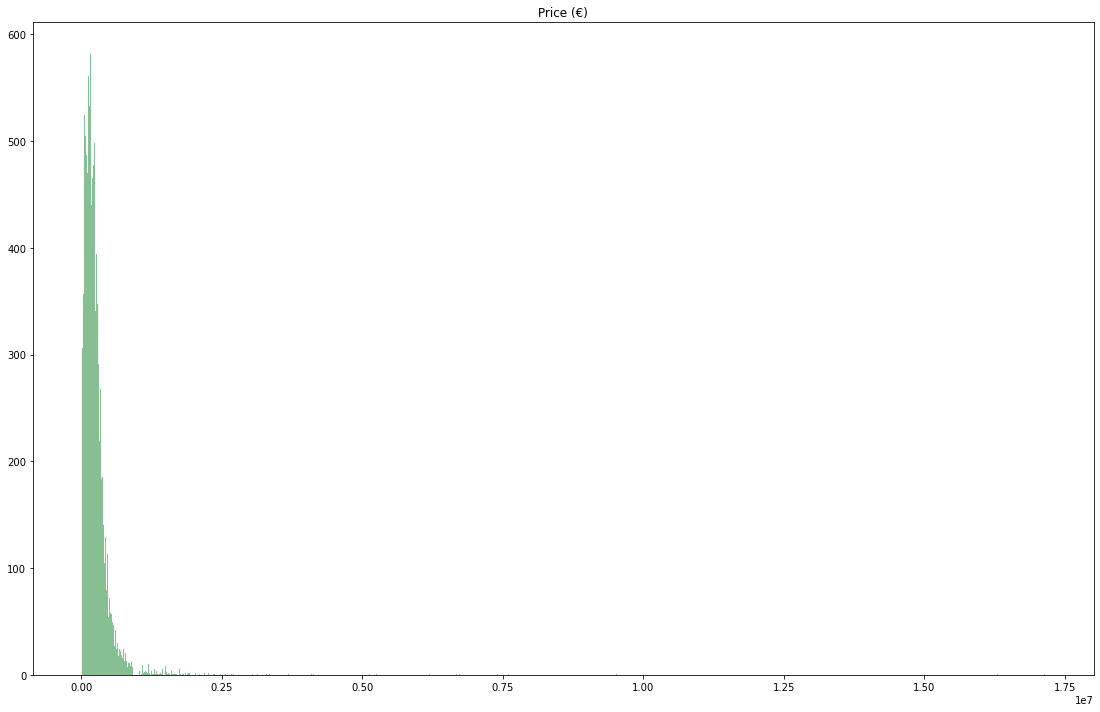

In [56]:
df.hist(column='Price (€)', bins='auto', grid=False, figsize=(19,12), color='#86bf91', zorder=2, rwidth=.9)
plt.savefig('Price_orginal_histo.png')


### Box Plot of Price

-  The outliers are further highlighted from looking at the box plot you can see there is a significant number of outliers

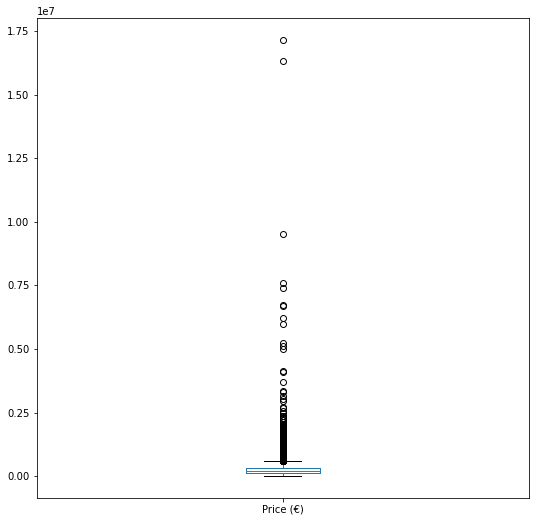

In [57]:
df[numeric_columns].plot(kind='box', subplots=True, figsize=(30,30), layout=(3,3), sharex=False, sharey=False)
plt.savefig('Price_orginalboxplot.png')


### Clamping Data price for Data visualising purposes:

In [58]:
upper = df['Price (€)'].quantile(0.99)
lower = df['Price (€)'].quantile(0.01)

Adjusted_price = np.where(df['Price (€)']>= upper,
                         upper, 
                         np.where(df['Price (€)']<= lower,
                                 lower,
                                 df['Price (€)']))


Adjusted_price_dataframe =pd.DataFrame(Adjusted_price, columns=['Adjusted Price']) 


### Interpretation of Clamping the data:

- This allows us to visualise the bulk of the data as it gets rid of some of the outliers.
- We can see that most price reside around the 100,000 mark to the 500,000 mark. 


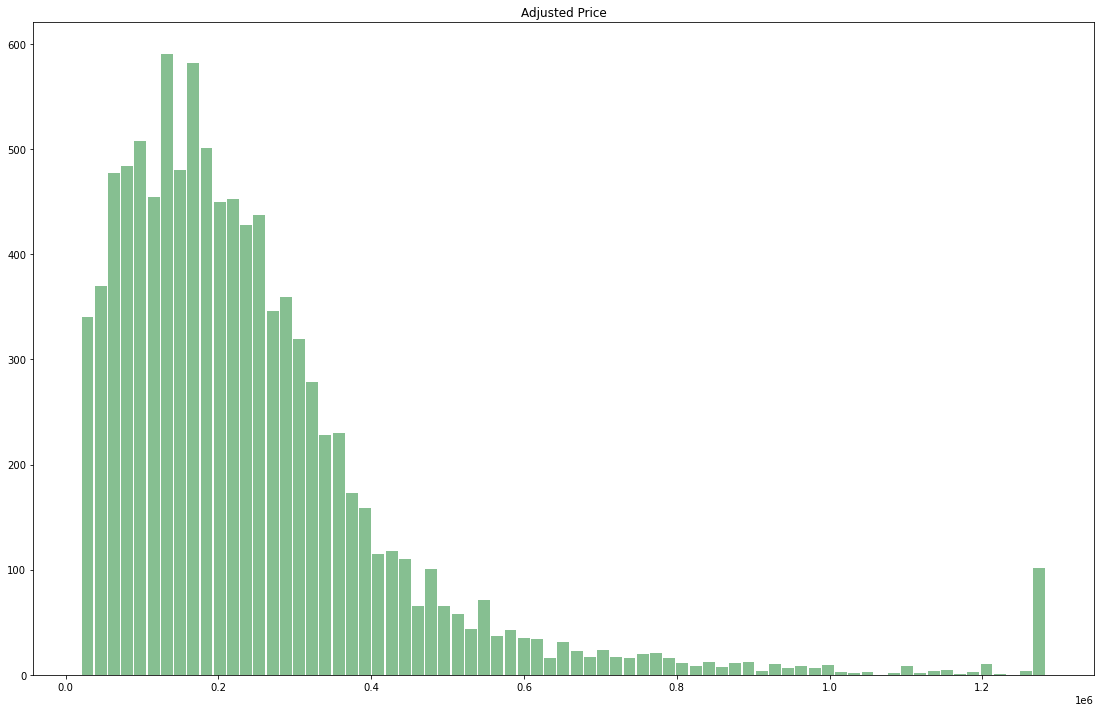

In [59]:
Adjusted_price_dataframe.hist(column='Adjusted Price', bins='auto', grid=False, figsize=(19,12), color='#86bf91', zorder=2, rwidth=.9)
plt.savefig('clampedPrice.png')

### Date of Sale feature 

In [60]:
df_sample_grouped = df.groupby(['Date of Sale (yyyy/mm/dd)']).size()
df_sample_grouped

Date of Sale (yyyy/mm/dd)
2010-01-02    2
2010-01-03    2
2010-01-04    1
2010-01-05    1
2010-01-06    3
             ..
2022-04-01    2
2022-05-01    1
2022-06-01    1
2022-07-01    3
2022-12-01    3
Length: 2759, dtype: int64

<AxesSubplot:>

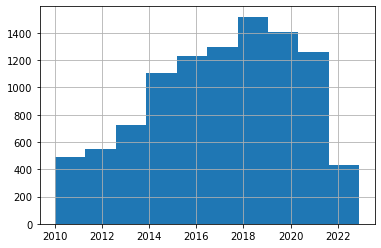

In [61]:
df['Date of Sale (yyyy/mm/dd)'].hist()

<AxesSubplot:>

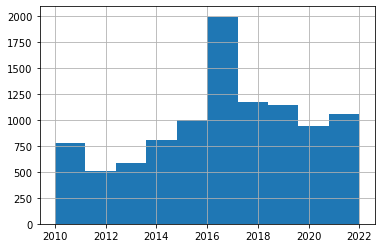

In [62]:
df['Year'].hist()

<AxesSubplot:>

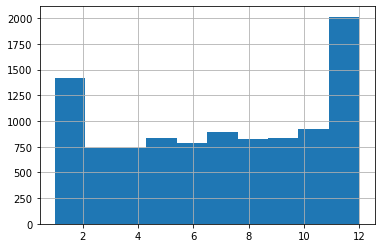

In [63]:
df['Month'].hist()

### Bar Charts for All Catergotical Features

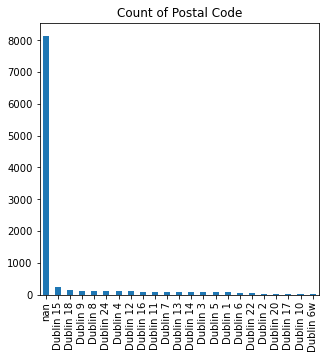

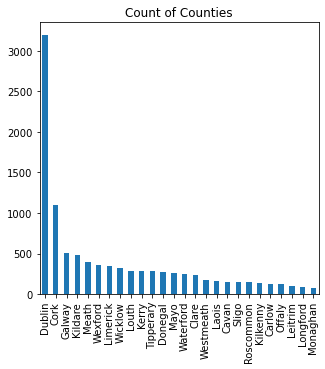

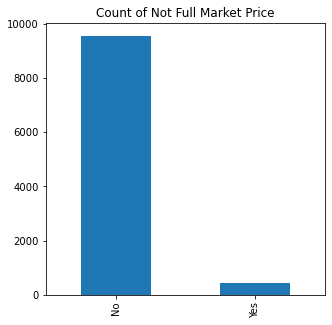

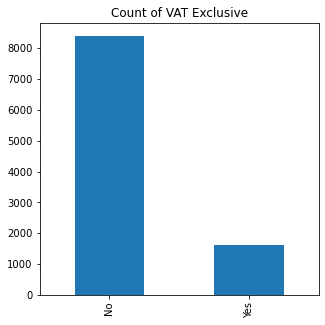

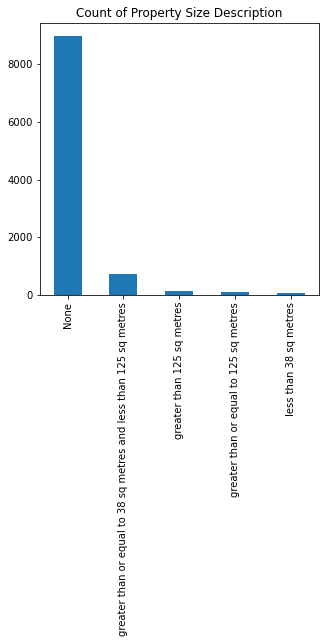

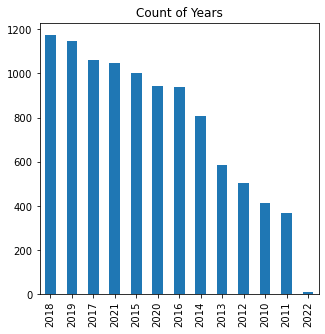

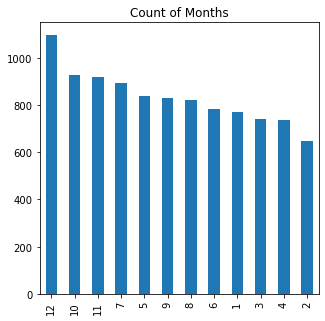

In [64]:
df['Postal Code'].value_counts(dropna=False).plot(kind='bar', figsize=(5,5))
plt.title("Count of Postal Code")
plt.savefig('postalCode_bar.png')

plt.show()

df['County'].value_counts(dropna=False).plot(kind='bar', figsize=(5,5))
plt.title("Count of Counties")
plt.savefig('counties_bar.png')

plt.show()


df['Not Full Market Price'].value_counts(dropna=False).plot(kind='bar', figsize=(5,5))
plt.title("Count of Not Full Market Price")
plt.savefig('NotFullMarketPrice_bar.png')

plt.show()

df['VAT Exclusive'].value_counts(dropna=False).plot(kind='bar', figsize=(5,5))
plt.title("Count of VAT Exclusive")
plt.savefig('VAT_exclusiveBar.png')

plt.show()


df['Property Size Description'].value_counts(dropna=False).plot(kind='bar', figsize=(5,5))
plt.title("Count of Property Size Description")
plt.savefig('Property_Size_DescriptionBar.png')

plt.show()



df['Year'].value_counts(dropna=False).plot(kind='bar', figsize=(5,5))
plt.title("Count of Years")

plt.savefig('Years_Bar.png')

plt.show()





df['Month'].value_counts(dropna=False).plot(kind='bar', figsize=(5,5))
plt.title("Count of Months")

plt.savefig('Months_bar.png')

plt.show()






### Interpretion of all bar charts of categorical features:

- Postal Code
    - As you can see the count for none is the highest. 
    - The area of Dublin 15 is the highest with Dublin 20 being the lowest
- County
    - This visualises the majority that Dublin has. 
    - It gives you good idea how low Monaghan is in comparison
- Not Full Market Price
    - This further depicts how the overwhelming majority of the house sales were full market price
- VAT exclusive
    - Again, this depicts that the overwhelming majority of house sales were not VAT exclusive
- Propery Size Description
    - As you can see the majority of house sales do not have a property description
    - Of the properties that do have descriptions, most are greater than or equal to 38 square metres and less than 125sq
- Year
    - The year 2018 has the most sales
    - 2022 has the least as the year is not complete
    - In general, they follow a gradual increasing trend as the years go by
- Month
    - December seems to have the most house sales, with February having the least
    - Possibly due to people wanting to get deals done before the new year.
    - They tend to follow a slight trend of the months later in the year having more sales than the months earlier in the year
    

<h1><center>Part 2: data quality plan for the cleaned CSV file</center></h1>

### List of data quality issues and proposed solutions

- Date of Sale (dd/mm/yyyy): This data was converted to datetime. The months and the years have been extracted as separate features in order for it to be easier to compare them to other features. Also, there was dates that indicated they were sold in the future. They will be adjusted as it appears they have entered incorrectly. 

- Postal Code:Large proportion missing. Opted to keep as could provide further geographical information about Dublin

- Price: Large variance in data makes it difficult for interpretation. There is potential to remove outliers

- Description of Property: Irish descriptions were translated so there were only two unique values for consistency.

- Property Size Description: This feature has a large amount of missing data. 

- Vat Exclusive: Less than 17% of the sales do not include the VAT in the sale price. I have chosen not to separate this data and keep it as one. 

- Not Full Market Price: There is a small amount of sales that were not full market price. I have decided to drop those sales as there are not a true reflection of market price. 


### Addressing 'Not Full Market Price':

- As mentioned I have chose to drop those that are not full market price. This a very small number of sales. There is a large number of reasons why a house would not be full market price such as fractional sales or government schemes. As these are not true representations of the market they are being dropped. 

In [65]:
df = df[df['Not Full Market Price'] == 'No']


Confirming they have been removed: 

In [66]:
df.loc[(df['Not Full Market Price'] == 'Yes')]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year


### Addressing 'Date of Sale (yyyy/mm/dd)' feature irregularity:

- As mentioned there are dates of sales in the future
- It appear as though the month was entered as the day. Thus, all these sales were actually completed in January 2022 and not later this year. In an effort to avoid deleting data, I have decided to swap the days and months to their correct position in order to maintain logical integrity.

In [67]:
df.loc[(df['Year'] == 2022) & 
                         (df['Month']> 0)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
1032,2022-04-01,"5 STRAFFAN GATE, STRAFFAN, KILDARE",NaN,Kildare,186974.0,No,No,Second-Hand Dwelling house /Apartment,None,4,2022
2742,2022-07-01,"78 HILL OF DOWN, SPENCER DOCK, MAYOR ST DUBLIN 1",Dublin 1,Dublin,382000.0,No,No,Second-Hand Dwelling house /Apartment,None,7,2022
3900,2022-07-01,"36 THE CAMMOCK, MOUNT BROWN, DUBLIN 8",Dublin 8,Dublin,231500.0,No,No,Second-Hand Dwelling house /Apartment,None,7,2022
4358,2022-12-01,"74 DAKOTA COURT, ROYAL CANAL BANK, PHIBSBOROUG...",Dublin 7,Dublin,278000.0,No,No,Second-Hand Dwelling house /Apartment,None,12,2022
5494,2022-12-01,"RUSHLAKE, WOODLAWN, BALLINASLOE",NaN,Galway,216500.0,No,No,Second-Hand Dwelling house /Apartment,None,12,2022
5540,2022-05-01,"BIRCHILL, DROMBANE, THURLES",NaN,Tipperary,160000.0,No,No,Second-Hand Dwelling house /Apartment,None,5,2022
6567,2022-12-01,"5 Cul na Claishe, Tralee",NaN,Kerry,30000.0,No,Yes,New Dwelling house /Apartment,None,12,2022
8340,2022-07-01,"TISSASSON, KINSALE, CORK",NaN,Cork,260000.0,No,No,Second-Hand Dwelling house /Apartment,None,7,2022


#### Correcting the data:

In [68]:
df.loc[1032,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-04',1]

df.loc[2742,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-07',1]

df.loc[3042,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-04',1]

df.loc[3900,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-07',1]

df.loc[4358,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-12',1]

df.loc[5494,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-12',1]

df.loc[5540,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-05',1]

df.loc[6237,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-06',1]

df.loc[6567,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-12',1]

df.loc[8340,['Date of Sale (yyyy/mm/dd)','Month']] = ['2022-01-07',1]


#### Corrected data:

In [69]:
df.loc[(df['Year'] == 2022) & 
                         (df['Month']> 0)]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
1032,2022-01-04,"5 STRAFFAN GATE, STRAFFAN, KILDARE",NaN,Kildare,186974.0,No,No,Second-Hand Dwelling house /Apartment,None,1.0,2022.0
2742,2022-01-07,"78 HILL OF DOWN, SPENCER DOCK, MAYOR ST DUBLIN 1",Dublin 1,Dublin,382000.0,No,No,Second-Hand Dwelling house /Apartment,None,1.0,2022.0
3900,2022-01-07,"36 THE CAMMOCK, MOUNT BROWN, DUBLIN 8",Dublin 8,Dublin,231500.0,No,No,Second-Hand Dwelling house /Apartment,None,1.0,2022.0
4358,2022-01-12,"74 DAKOTA COURT, ROYAL CANAL BANK, PHIBSBOROUG...",Dublin 7,Dublin,278000.0,No,No,Second-Hand Dwelling house /Apartment,None,1.0,2022.0
5494,2022-01-12,"RUSHLAKE, WOODLAWN, BALLINASLOE",NaN,Galway,216500.0,No,No,Second-Hand Dwelling house /Apartment,None,1.0,2022.0
5540,2022-01-05,"BIRCHILL, DROMBANE, THURLES",NaN,Tipperary,160000.0,No,No,Second-Hand Dwelling house /Apartment,None,1.0,2022.0
6567,2022-01-12,"5 Cul na Claishe, Tralee",NaN,Kerry,30000.0,No,Yes,New Dwelling house /Apartment,None,1.0,2022.0
8340,2022-01-07,"TISSASSON, KINSALE, CORK",NaN,Cork,260000.0,No,No,Second-Hand Dwelling house /Apartment,None,1.0,2022.0


### Addressing 'Property Size Desciption' feature:

- From the below figures it is shown that 90% of this data is missing. However, as is shown 62% of New Dwelling house/Apartments have a Property Size Description attributed to them. Thus, it may be valuable information to help look at the target feature Price later on. 
- It is important to not needlessly throw out data in case in could be useful in the future as we attempt to predict house prices. 

In [70]:
df["Property Size Description"].describe().T

count     9552
unique       5
top       None
freq      8554
Name: Property Size Description, dtype: object

In [71]:
df['Property Size Description'].unique()

['None', 'greater than 125 sq metres', 'greater than or equal to 38 sq metres and les..., 'greater than or equal to 125 sq metres', 'less than 38 sq metres', NaN]
Categories (5, object): ['None', 'greater than 125 sq metres', 'greater than or equal to 38 sq metres and les..., 'greater than or equal to 125 sq metres', 'less than 38 sq metres']

In [72]:
df['Property Size Description'].value_counts()

None                                                                 8554
greater than or equal to 38 sq metres and less than 125 sq metres     704
greater than 125 sq metres                                            129
greater than or equal to 125 sq metres                                 91
less than 38 sq metres                                                 74
Name: Property Size Description, dtype: int64

In [73]:
df['Property Size Description'].isnull().sum()

2

In [74]:
df.groupby('Description of Property')['Property Size Description'].count()

Description of Property
New Dwelling house /Apartment            1572
Second-Hand Dwelling house /Apartment    7980
Name: Property Size Description, dtype: int64

In [75]:
df.loc[(df['Description of Property'] == 'New Dwelling house /Apartment') & 
                         (df['Property Size Description'].isna())]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year


In [76]:
df.groupby('Description of Property').count()

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Property Size Description,Month,Year
Description of Property,,,,,,,,,,
New Dwelling house /Apartment,1572,1572,207,1572,1572,1572,1572,1572,1572,1572
Second-Hand Dwelling house /Apartment,7980,7980,1556,7980,7980,7980,7980,7980,7980,7980


### Addressing the 'VAT exclusive' data

In [77]:
df.loc[df['Description of Property'] == 'New Dwelling house /Apartment']

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
7,2016-02-05 00:00:00,"Ballygibbon, Nenagh",NaN,Tipperary,264317.00,No,Yes,New Dwelling house /Apartment,greater than 125 sq metres,2.0,2016.0
10,2015-06-15 00:00:00,"Apt 350 Block 8B, Tallaght Cross West, Dublin 24",Dublin 24,Dublin,99433.75,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,6.0,2015.0
15,2021-03-06 00:00:00,"4 INISHFALLEN, ROOKERY ROAD, KILLARNEY",NaN,Kerry,340000.00,No,Yes,New Dwelling house /Apartment,None,3.0,2021.0
20,2017-07-04 00:00:00,"Knockanna, Tinahely",NaN,Wicklow,105000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 125 sq metres,7.0,2017.0
24,2010-07-09 00:00:00,"30 Broadfield Drive, Broadfield Manor, Rathcoole",NaN,Dublin,281938.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,7.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...
9967,2018-03-08 00:00:00,"152 BEECHDALE, DUNBOYNE, MEATH",NaN,Meath,330000.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,3.0,2018.0
9979,2010-03-11 00:00:00,"3 Holywell Grove, Kilcoole",NaN,Wicklow,233480.17,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,3.0,2010.0
9983,2021-06-30 00:00:00,"Knockmore, Drinagh",NaN,Cork,233000.00,No,Yes,New Dwelling house /Apartment,None,6.0,2021.0
9991,2018-11-19 00:00:00,"14 Roseberry Hill, Quinagh, CARLOW",NaN,Carlow,173173.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,11.0,2018.0


In [78]:
print("number of 'Yes VAT exclusives: '",(df['VAT Exclusive'] == 'Yes').sum())
print("number of New Dwelling house/Apartment '",(df['Description of Property'] == 'New Dwelling house /Apartment').sum())

number of 'Yes VAT exclusives: ' 1542
number of New Dwelling house/Apartment ' 1572


In [79]:
df.loc[(df['Description of Property'] == 'New Dwelling house /Apartment') & (df['VAT Exclusive'] == 'No')]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
199,2017-08-05 00:00:00,"Unit 271 Roseberry Hill, Newbridge",NaN,Kildare,235000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,8.0,2017.0
479,2016-08-23 00:00:00,"33 Shannon Quays, Rooskey",NaN,Leitrim,132159.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,8.0,2016.0
738,2014-08-09 00:00:00,"Woodbine Heights, Spanish Point",NaN,Clare,48242.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,8.0,2014.0
822,2016-12-23 00:00:00,"4 The Parade, Riverchapel Wood, Riverchapel C...",NaN,Wexford,130000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,12.0,2016.0
1382,2012-08-22 00:00:00,"8 Cois Abhann, Excise Street/Lyster Street, At...",NaN,Westmeath,125000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,8.0,2012.0
1704,2010-01-27 00:00:00,"no 8 emmet place, nenagh",NaN,Tipperary,140000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,1.0,2010.0
2458,2018-11-14 00:00:00,"2 THE GRAINSTORE, BAGENALSTOWN, CARLOW",NaN,Carlow,107825.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,11.0,2018.0
2744,2015-06-11 00:00:00,"50 Abhainn glas, Edgeworthstown",NaN,Longford,35000.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,6.0,2015.0
3540,2013-06-28 00:00:00,"48 Gleann Bhan, Ballybane, Galway",NaN,Galway,57750.00,No,No,New Dwelling house /Apartment,less than 38 sq metres,6.0,2013.0
4653,2010-07-29 00:00:00,"105 Lios Ard, Tulla Rd",NaN,Clare,170500.00,No,No,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,7.0,2010.0


- Only 35 "New Dwelling house/Apartment" are marked as 'No' for Vat Exclusive. 
- The other 1601 are marked as 'Yes'. 
- This is in line with the information for the revenue regarding VAT payments on new property. 
- New properties that meet certain conditions must pay VAT at a rate of 13.5%- https://www.revenue.ie/en/property/stamp-duty/consideration/vat-exclusive-consideration.aspx#:~:text=If%20you%20buy%20or%20lease,on%20the%20VAT%2Dexclusive%20amount.
- This does not apply to second hand property which we can see in the data:

In [80]:
print("number of 'No' VAT exclusives: '",(df['VAT Exclusive'] == 'No').sum())


number of 'No' VAT exclusives: ' 8010


- For this there is no reason to extract or remove any of the Vat Exclusive data as there are differences only for a very small amount of data and the difference may only be 13.5%

## Looking at the outliers of the price data 

As you can see there is a large range of values for the target feature of price. 

In [81]:
print(df['Price (€)'].mean(), "mean of price data")
print(df['Price (€)'].std(), "standard deviation of price data")

265810.8145236603 mean of price data
397510.6473498498 standard deviation of price data


There are some sales that were very high in price. These are explored in more detail later:

In [82]:
df.sort_values(by='Price (€)', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)

,Price (€)
4518,17151248.00
7913,16308370.05
7698,9515419.00
915,7600000.00
6404,7405286.34
3167,6720000.00
3999,6680000.00
5961,6200000.00
9789,6000000.00
2645,5250000.00


#### Evaluating the lower end outliers: 

- As you can see some values for sales are extremely low like €5500. Having looked into these sales these sales in more detail there are number of reasons for this.
- For example, some are that low because they are ruins that were bought 9 years ago. Thus, It is difficult to determine if they were input mistakes or genuine mistakes. 
- Due to this uncertainty I have decided to keep these outliers. 

In [83]:
df.sort_values(by='Price (€)', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)

,Price (€)
2094,5500.0
2661,6348.0
2772,6608.0
2950,7250.0
2582,7300.0
2749,7500.0
2846,7500.0
9200,7770.0
5487,8000.0
849,8000.0


In [84]:
df.loc[df['Price (€)'] <= 10000]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
624,2018-05-29 00:00:00,"617 HOWTH ROAD, RAHENY, DUBLIN 5",Dublin 5,Dublin,10000.00,No,No,Second-Hand Dwelling house /Apartment,None,5.0,2018.0
849,2014-08-20 00:00:00,"Glensharrold, Carrickerry",NaN,Limerick,8000.00,No,No,Second-Hand Dwelling house /Apartment,None,8.0,2014.0
1276,2017-11-09 00:00:00,"226 CASTLE CURRAGH HEATH, DUBLIN 15, DUBLIN",Dublin 15,Dublin,8697.91,No,No,Second-Hand Dwelling house /Apartment,None,11.0,2017.0
1320,2016-04-13 00:00:00,"RAEMORE, KIELDUFF, CO KERRY",NaN,Kerry,10000.00,No,No,Second-Hand Dwelling house /Apartment,None,4.0,2016.0
1480,2015-09-22 00:00:00,"20 MILLWHARF APARTMENTS, MERCHANTS QUAY, DROGHEDA",NaN,Louth,9039.78,No,No,Second-Hand Dwelling house /Apartment,None,9.0,2015.0
1580,2010-03-12 00:00:00,"MAIN STREET, KILTEALY",NaN,Wexford,10000.00,No,No,Second-Hand Dwelling house /Apartment,None,3.0,2010.0
2094,2015-12-14 00:00:00,"19 Aranleigh Mount, Rathfarnham, Dublin 14",Dublin 14,Dublin,5500.00,No,No,Second-Hand Dwelling house /Apartment,None,12.0,2015.0
2267,2015-10-06 00:00:00,"APT 35 BUCKINGHAM VILLAGE, DUBLIN 1, DUBLIN",Dublin 1,Dublin,10000.00,No,No,Second-Hand Dwelling house /Apartment,None,10.0,2015.0
2582,2019-02-04 00:00:00,"74 SPRING LANE RD, BALLYVOLANE, CORK",NaN,Cork,7300.00,No,No,Second-Hand Dwelling house /Apartment,None,2.0,2019.0
2661,2013-10-14 00:00:00,"Friarsquarter, Ballinrobe",NaN,Mayo,6348.00,No,No,Second-Hand Dwelling house /Apartment,None,10.0,2013.0


array([[<AxesSubplot:title={'center':'Price (€)'}>]], dtype=object)

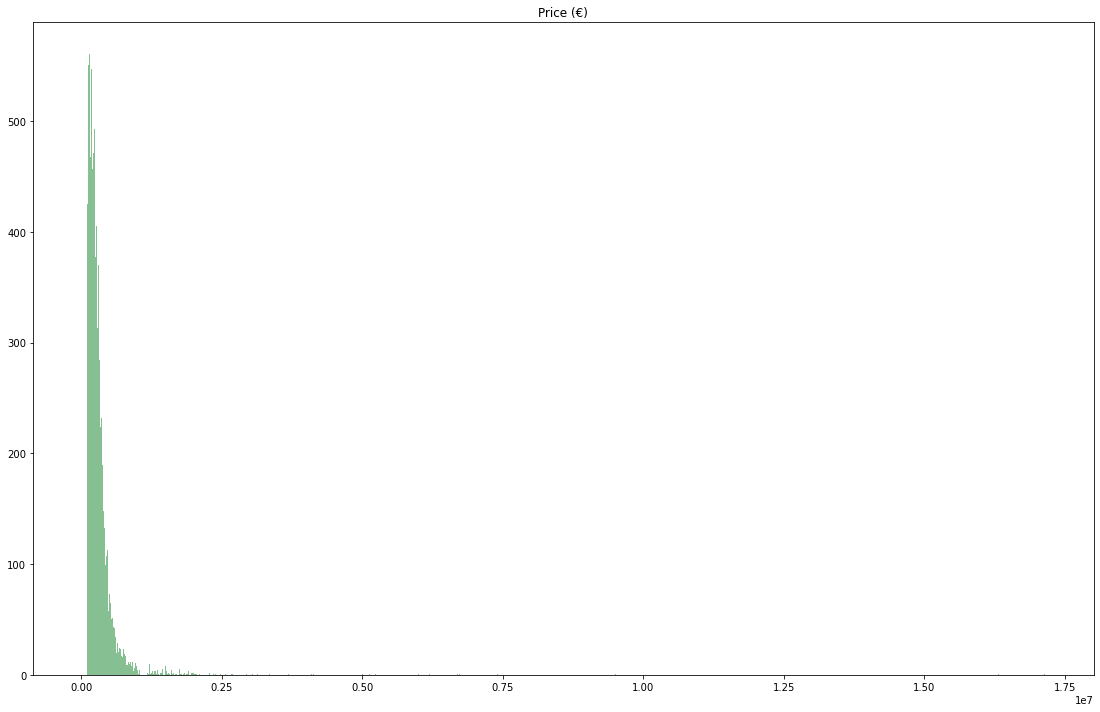

In [85]:
df.hist(column='Price (€)', bins='auto', grid=False, figsize=(19,12), color='#86bf91', zorder=2, rwidth=.9)


In [86]:
df.sort_values(by='Price (€)', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)


,Price (€)
4518,17151248.00
7913,16308370.05
7698,9515419.00
915,7600000.00
6404,7405286.34
3167,6720000.00
3999,6680000.00
5961,6200000.00
9789,6000000.00
2645,5250000.00


### Dropping apartment blocks and multiple housing units: 

- The sale of property such as those worth €17,151,248 and €16308370.05 have been dropped. 
- As these is a large blocks of apartments. Thus, it does not makes sense to compare it to other sing dwellings which is our overall aim. 

### Looking for addresses that are selling as multiple 'units':

In [87]:
df[df['Address'].str.contains("Units")==True]

,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
561,2020-11-20 00:00:00,"Units 51-54 Sruthan Na Sailí, & Apts.1-18 Áras...",NaN,Kerry,4096916.28,No,Yes,New Dwelling house /Apartment,None,11.0,2020.0
4459,2020-01-10 00:00:00,"Units 1-7 Croppy Boy, Fairhill",NaN,Cork,1788546.26,No,Yes,New Dwelling house /Apartment,None,1.0,2020.0
6404,2020-09-09 00:00:00,"Units 1-24, Block C, Gandon Grove",NaN,Dublin,7405286.34,No,Yes,New Dwelling house /Apartment,None,9.0,2020.0


In [88]:
df[df['Address'].str.contains("units")==True]


,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year


In [89]:
df[df['Address'].str.contains("unit")==True]


,Date of Sale (yyyy/mm/dd),Address,Postal Code,County,Price (€),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description,Month,Year
2292,2016-10-20 00:00:00,"unit 11 Hampton Gardens Drive, Balbriggan, Cou...",NaN,Dublin,180616.74,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,10.0,2016.0
4624,2018-07-27 00:00:00,"unit 3 Parkside Glen, parkside, malahide road",NaN,Dublin,361233.00,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,7.0,2018.0


#### Dropping necessary indexes: 

In [90]:

# All large blocks of apartments with no accurate way of braking up the dwellings and determining their individual prices

df = df.drop(index=7913)
df = df.drop(index=4518)
df = df.drop(index=7698)
df = df.drop(index=6404)
df = df.drop(index=3999)
df = df.drop(index=561)
df = df.drop(index=4459)










####  With outliers removed:

In [91]:
df.sort_values(by='Price (€)', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')[['Price (€)']].head(10)


,Price (€)
915,7600000.00
3167,6720000.00
5961,6200000.00
9789,6000000.00
2645,5250000.00
4438,5127753.00
2542,5000000.00
787,4138200.00
8462,3691629.96
242,3350000.00


#### The histogram of price looks like this with the outliers removed which is now slightly better visually:

- There is is still a large spread of data. However, it has been tighten slightly. 

array([[<AxesSubplot:title={'center':'Price (€)'}>]], dtype=object)

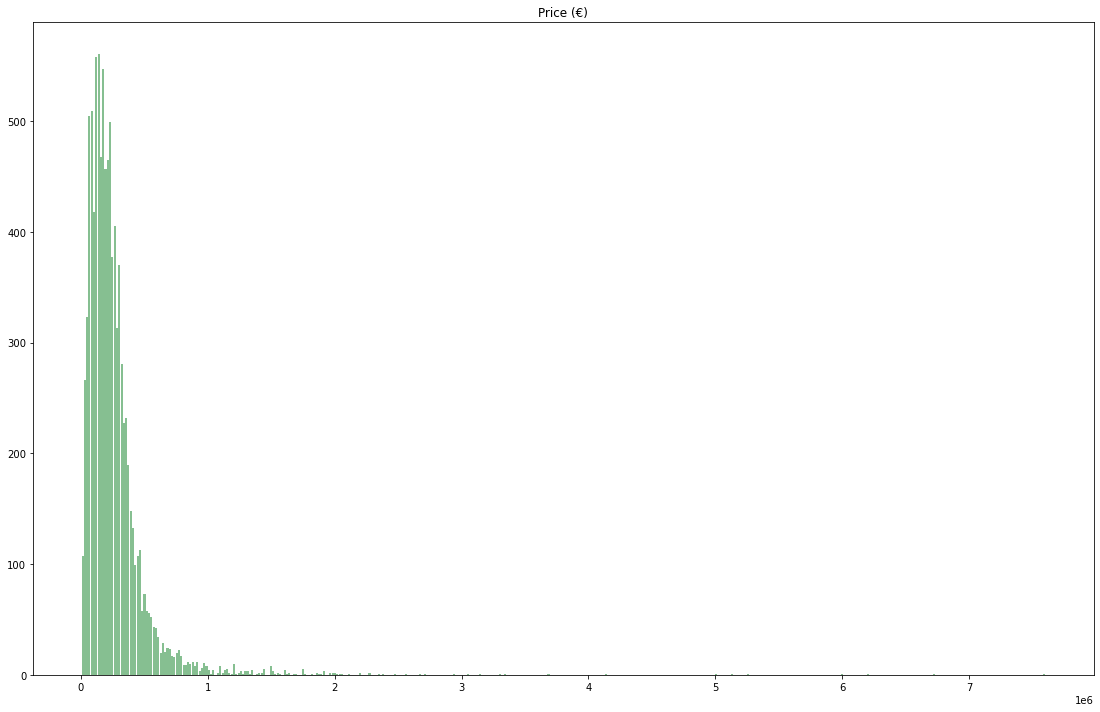

In [92]:
df.hist(column='Price (€)', bins='auto', grid=False, figsize=(19,12), color='#86bf91', zorder=2, rwidth=.9)


## Final Summary of Data Quality Plan

| Variable Name | Data Quality Issue | Handling Strategy |
| :- | :- | :- |
| Price (€) | Outliers | Remove high outliers as they are large blocks of apartments, keep low outliers |
| Postal Code | Missing data |Do nothing|
| Description of Property | Descriptions were in Irish | Irish descriptions were translated so there were only two unique values for consistency |
| Property Size Description | Missing data | Do nothing |
| VAT exclusive | Provides varying info, with potentially not much meaning | Do nothing |
| Date of Sale| There are dates in the future | Edit future dates |
| Not Full Market Price	| very small % dwellings are not full market price | Removed |




In [93]:
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Price (€),9545.0,259411.117276,284346.547436,5500.0,123000.0,206090.0,314977.97,7600000.0


In [94]:
df[category_columns].describe().T

,count,unique,top,freq
Address,9545,9525,"Glackmore, Aught Road, Muff",2
Postal Code,1762,22,Dublin 15,222
County,9545,26,Dublin,3046
Not Full Market Price,9545,1,No,9545
VAT Exclusive,9545,2,No,8008
Description of Property,9545,2,Second-Hand Dwelling house /Apartment,7978
Property Size Description,9545,5,None,8547


#### Applying solutions to new csv file with the issues addressed:

In [95]:
df.to_csv('cleanedCSV_after_data_quality_plan-ppr-17350796.csv', index=False)

<h1><center>Part 3: Exploring the relationships between feature pairs:</center></h1>


We want to be able to say something about the price data. 
The features that I will look at for pairwise interaction:

- County
- Date
    - Year
    - Month
- Description of property
- Postal Code 

The reasons for these choices, are these factors could all give insight and to provide markers into house prices. More detail on this is given throughout the section. 




### County and Price 

-  The reason for this comparison as I want to see how prices change with counties. Location is often a key factor that dictates house prices. The counties of Ireland provide a clear boundary to assess different areas of the country. 

### Finding median and average Price Per County


In [96]:
#creating data frame of just price and county
df_Price_Per_county = df[['County', 'Price (€)']].copy()

df_Price_Per_county.head(5)


,County,Price (€)
0,Dublin,630000.0
1,Dublin,281000.0
2,Dublin,560000.0
3,Kilkenny,46000.0
4,Clare,204000.0


### Full description:

In [97]:
df_Price_Per_county.groupby(['County']).describe()

Price (€)                                                    \
              count           mean            std       min       25%   
County                                                                  
Carlow        117.0  147159.265556   86185.590695  10000.00   87000.0   
Cavan         150.0  124315.741000   81913.503086  10000.00   62250.0   
Clare         231.0  177071.482251  176994.697218  16000.00   86500.0   
Cork         1056.0  223552.358722  156701.066732   7300.00  125000.0   
Donegal       260.0  120418.497115   72040.172053  10000.00   69000.0   
Dublin       3046.0  406048.971596  397801.605157   5500.00  227000.0   
Galway        487.0  203262.215195  163568.836711   6608.00  107750.0   
Kerry         270.0  169086.391704  103014.187349  10000.00   90000.0   
Kildare       442.0  289886.004796  347232.603145  34140.94  190000.0   
Kilkenny      124.0  188486.653306  133196.044931  35000.00  110000.0   
Laois         152.0  152324.580329   89186.273530  16000.00   87158.5   
Leitrim        93.0  103932.636667   85872.614548  15000.00   55000.0   
Limerick      340.0  169452.290059  102413.488578   7500.00   90000.0   
Longford       81.0   95701.623210   58491.257404  18320.00   50000.0   
Louth         269.0  181161.377807  140726.040548   7250.00  100000.0   
Mayo          252.0  130630.549365   97845.013639   6348.00   63750.0   
Meath         395.0  246837.097038  129793.034188  28000.00  172750.0   
Monaghan       69.0  158595.593188  117896.239469  20000.00   80000.0   
Offaly        109.0  146377.890092  121544.317727  10000.00   79000.0   
Roscommon     135.0  108703.772000   70852.899209  10000.00   52681.5   
Sligo         139.0  121077.682230   90728.912323  10000.00   68000.0   
Tipperary     269.0  131143.793755   85339.613923   7500.00   63000.0   
Waterford     233.0  158057.382918  109425.037255  25000.00   80000.0   
Westmeath     170.0  159453.886059  100859.554229  13333.00   91250.0   
Wexford       349.0  189979.543496  258091.052671  10000.00  100000.0   
Wicklow       307.0  318262.366710  197398.996591  34000.00  196500.0   

                                              
                  50%        75%         max  
County                                        
Carlow     137000.000  185000.00   540000.00  
Cavan      104350.220  155750.00   370000.00  
Clare      150000.000  221250.00  2275000.00  
Cork       195000.000  280000.00  1905000.00  
Donegal    109000.000  150500.00   420000.00  
Dublin     320000.000  455000.00  7600000.00  
Galway     177500.000  259000.00  2026432.00  
Kerry      150000.000  228144.75   643172.00  
Kildare    256753.300  325997.75  6720000.00  
Kilkenny   165000.000  232999.25  1150000.00  
Laois      140000.000  190000.00   500000.00  
Leitrim     85000.000  129500.00   670000.00  
Limerick   160000.000  230000.00   640044.00  
Longford    85000.000  125000.00   275000.00  
Louth      165000.000  225000.00  1900000.00  
Mayo       112569.935  167750.00   705000.00  
Meath      233480.000  306250.00  1636123.00  
Monaghan   150000.000  180000.00   850000.00  
Offaly     113000.000  180000.00   800000.00  
Roscommon   95000.000  150000.00   330000.00  
Sligo       95000.000  156000.00   700000.00  
Tipperary  121000.000  175000.00   665700.00  
Waterford  142000.000  201000.00  1100000.00  
Westmeath  145000.000  198750.00   600000.00  
Wexford    155000.000  220277.00  3691629.96  
Wicklow    287500.000  387750.00  1440000.00

Making new data frame with just group county and mean 

In [98]:
mean_price_per_county= df_Price_Per_county.groupby(['County']).mean().reset_index()


mean_price_per_county.sort_values(by=['Price (€)'], inplace=True)
print(mean_price_per_county)


       County      Price (€)
13   Longford   95701.623210
11    Leitrim  103932.636667
19  Roscommon  108703.772000
4     Donegal  120418.497115
20      Sligo  121077.682230
1       Cavan  124315.741000
15       Mayo  130630.549365
21  Tipperary  131143.793755
18     Offaly  146377.890092
0      Carlow  147159.265556
10      Laois  152324.580329
22  Waterford  158057.382918
17   Monaghan  158595.593188
23  Westmeath  159453.886059
7       Kerry  169086.391704
12   Limerick  169452.290059
2       Clare  177071.482251
14      Louth  181161.377807
9    Kilkenny  188486.653306
24    Wexford  189979.543496
6      Galway  203262.215195
3        Cork  223552.358722
16      Meath  246837.097038
8     Kildare  289886.004796
25    Wicklow  318262.366710
5      Dublin  406048.971596


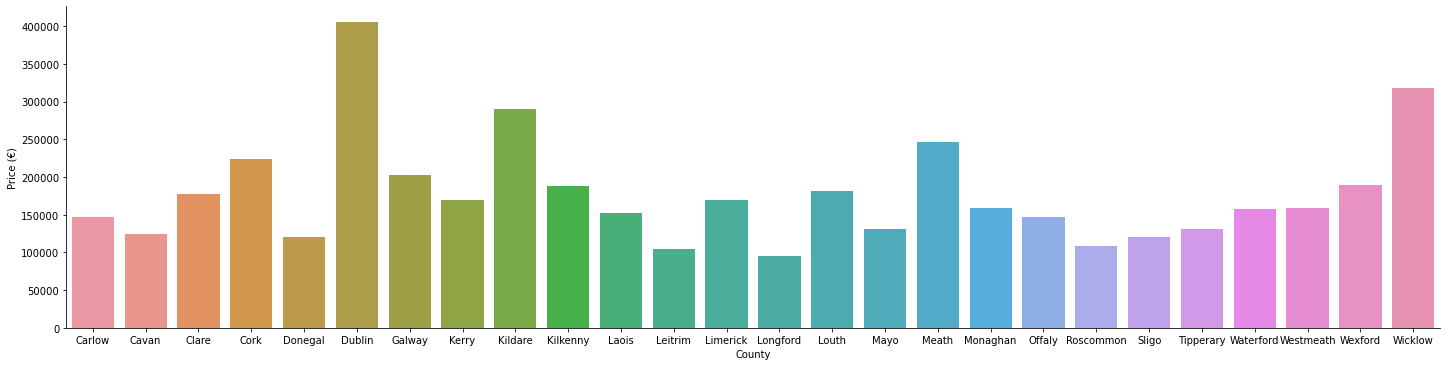

In [99]:
sns.catplot(x="County", y= "Price (€)", kind="bar",aspect=4,data=mean_price_per_county)

### Both the median and the mean provide similar results

In [100]:
median_price_per_county = df_Price_Per_county.groupby(['County']).median().reset_index()

median_price_per_county.sort_values(by=['Price (€)'], inplace=True)
print(median_price_per_county)


       County   Price (€)
13   Longford   85000.000
11    Leitrim   85000.000
20      Sligo   95000.000
19  Roscommon   95000.000
1       Cavan  104350.220
4     Donegal  109000.000
15       Mayo  112569.935
18     Offaly  113000.000
21  Tipperary  121000.000
0      Carlow  137000.000
10      Laois  140000.000
22  Waterford  142000.000
23  Westmeath  145000.000
2       Clare  150000.000
7       Kerry  150000.000
17   Monaghan  150000.000
24    Wexford  155000.000
12   Limerick  160000.000
14      Louth  165000.000
9    Kilkenny  165000.000
6      Galway  177500.000
3        Cork  195000.000
16      Meath  233480.000
8     Kildare  256753.300
25    Wicklow  287500.000
5      Dublin  320000.000


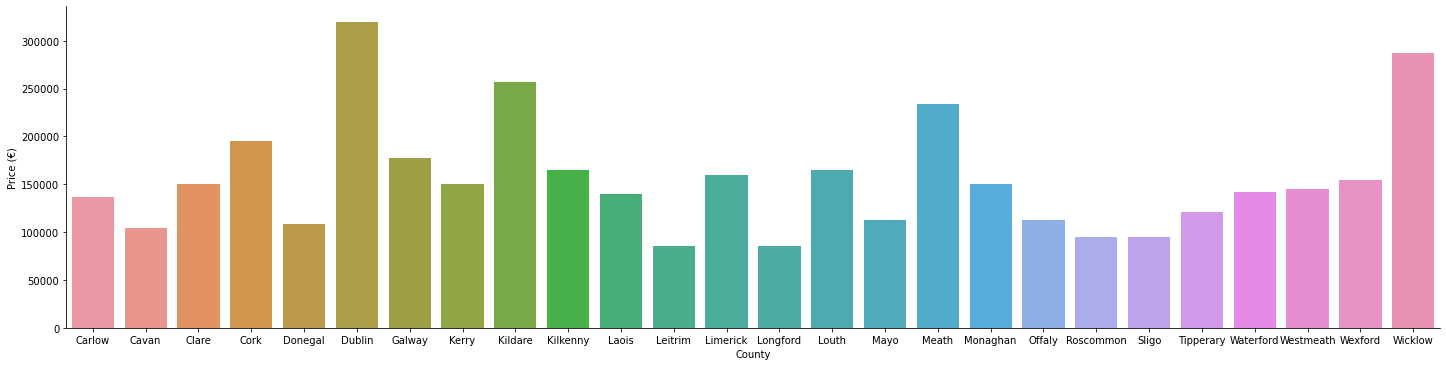

In [101]:
sns.catplot(x="County", y= "Price (€)", kind="bar",aspect=4,data=median_price_per_county)

### Interpretation

- As you can see Dublin has the highest amount with Longford, Roscommon and Leitrim being the lowest. The counties that border Dublin like Meath, Wicklow and Kildare all have very high median and mean values. 
- We can clearly see that the area of Dublin is the most sought after. 

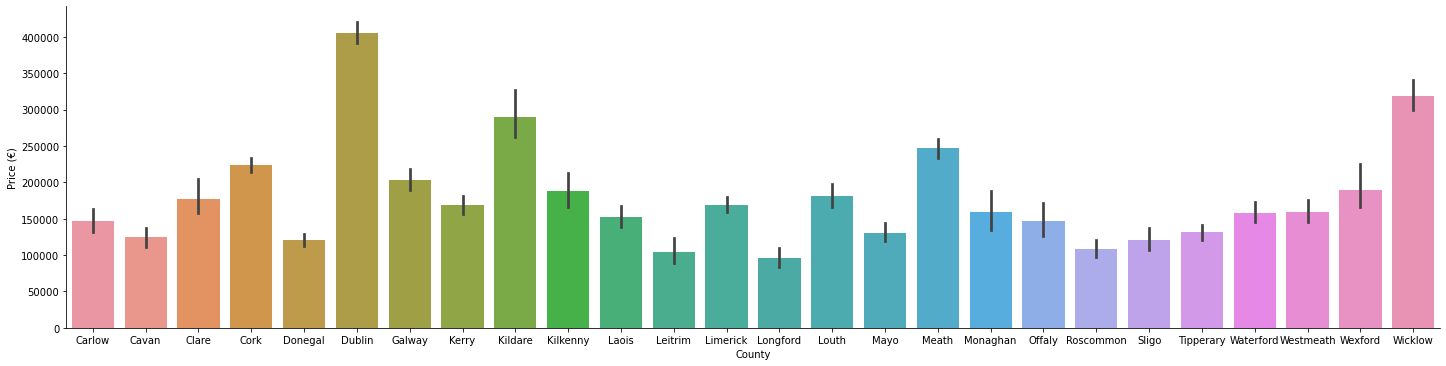

In [102]:
sns.catplot(x="County", y= "Price (€)", kind="bar",aspect=4,data=df)

### County and Price Box plot

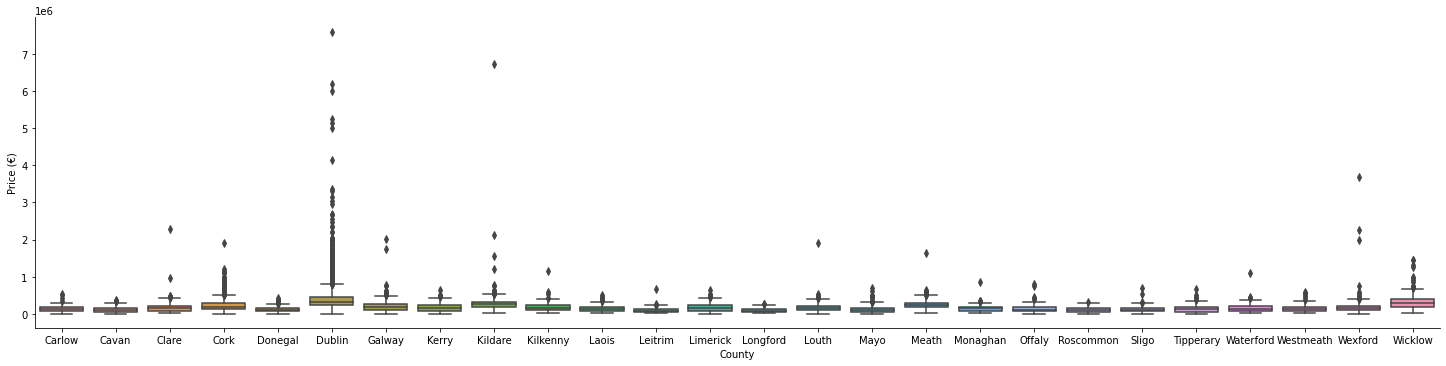

In [103]:
sns.catplot(x="County", y= "Price (€)", kind="box",aspect=4,data=df)

### Year and Price 

- Year and Price is another very important interaction as we are aiming to predict price which means we must look to the future. The year to year trends are very important for this. 

### Year and Price bar chart

- As you can see 2012 has the lowest with 2021 having the highest

In [ ]:
sns.catplot(x="Year", y= "Price (€)", kind="bar",aspect=4,data=df)

### Median and Average Price Per Year

In [ ]:
df_Price_Per_year = df[['Year', 'Price (€)']].copy()

df_Price_Per_year.head(5)



### Full description table of price grouped by Year:

In [ ]:
df_Price_Per_year.groupby(['Year']).describe()

- Finding the mean of year and putting into its own data frame in order to visualise with graphs. 

In [ ]:
mean_price_per_year = df_Price_Per_year.groupby(['Year']).mean().reset_index()

mean_price_per_year

In [ ]:
scatter_plot_mean_price_year = mean_price_per_year.plot.scatter(x='Year',
                      y='Price (€)')

In [ ]:
sns.catplot(x="Year", y= "Price (€)", kind="bar",aspect=4,data=mean_price_per_year)

In [ ]:
median_price_per_year = df_Price_Per_year.groupby(['Year']).median().reset_index()


In [ ]:
scatter_plot_median_price_year = median_price_per_year.plot.scatter(x='Year',
                      y='Price (€)')

In [ ]:
sns.catplot(x="Year", y= "Price (€)", kind="bar",aspect=4,data=median_price_per_year)

#### Interpretation of above

- From looking at the scatter plots and bar charts for mean and median per year you can see certain trend of prices. 
- There has been a sharp increase in house prices from 2012/2013

### Year and Price boxplot

As you can see there are a lot of outliers outliears throughout the 12 years:

In [ ]:
sns.catplot(x="Year", y= "Price (€)", kind="box",aspect=4,data=df)

### Month and Price bar plot

- As you can see for each month over the time price stays relatively consistent 

In [ ]:
sns.catplot(x="Month", y= "Price (€)", kind="bar",aspect=4,data=df)

### Month and Price boxplot

In [ ]:
sns.catplot(x="Month", y= "Price (€)", kind="box",aspect=4 ,data=df)

### Decription of property and Price bar chart 

- From the below analysis you can clearly see that new properties tend to be more expensive. 

In [ ]:
df_property_description = df[['Description of Property', 'Price (€)']].copy()

df_property_description.head(5)

In [ ]:
df_property_description.groupby(['Description of Property']).describe()

In [ ]:
df_property_description.groupby(['Description of Property']).median()

In [ ]:
sns.catplot(x="Description of Property", y= "Price (€)", kind="bar",aspect=4,data=df)

### Postal Code and Price bar chart

- While Postal Codes are not applicable to the majority of the addresses in this data set. There do provide insight into the areas of Dublin which is the most represented county in Ireland. 
- The traditionally more 'affluent' areas of Dublin are represented with the highest amount of price like Dublin 4. 

In [ ]:
sns.catplot(x="Postal Code", y= "Price (€)", kind="bar",aspect=4,data=df)

In [ ]:
df.groupby(['Postal Code']).describe()

In [ ]:
df.groupby(['Postal Code']).median()

In [ ]:
df_Price_Per_postalcode = df[['Postal Code', 'Price (€)']].copy()

mean_price_per_postalcode= df_Price_Per_postalcode.groupby(['Postal Code']).mean().reset_index()



In [ ]:
sns.catplot(x="Postal Code", y= "Price (€)", kind="bar",aspect=4,data=mean_price_per_postalcode)

In [ ]:
median_price_per_postalcode= df_Price_Per_postalcode.groupby(['Postal Code']).median().reset_index()

sns.catplot(x="Postal Code", y= "Price (€)", kind="bar",aspect=4,data=median_price_per_postalcode)


- Interestingly Dublin 4 has the highest mean, yet Dublin 6 has the highest median. 
- We can see this when we look at the descriptive table above that the area of Dublin 4 has a very large range of values. 
- It is important to keep in mind that these postal codes do not tell the whole story as large parts of North County Dublin and South County Dublin are not included.

### Postal Code and Price boxplot

- We can see that Dublin 4 has a significant number of outliers here, that is way it has such a high average price: 

In [ ]:
sns.catplot(x="Postal Code", y= "Price (€)", kind="box",aspect=4,data=df)

### Categorical vs Categorical feature plots

#### Comparing Description of Property and County

- This shows the percentage of New Dwellings to Second Hand dwellings:

In [ ]:
County = pd.unique(df["County"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("County")
print("Index \t Count")

for i in County:
    
    count = df[df["County"] == i].count()['Description of Property']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['County'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','County','Description of Property']].groupby(['County','Description of Property']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="County vs Description of Property", figsize=(15,7), grid=True)


my_plot.legend(["New Dwellings", "Second Hand"])
    
# add gridlines
plt.grid(b=True, which='major', color='#666666', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Countys")
my_plot.set_ylabel("%")
my_plot.set_ylim([0,100])

### Interpretation:

- We can see that the border counties of Kildare, Meath, and Wicklow see the greates amount of new dwellings. 
- This makes sense as people look to move closer to Dublin while avoiding the astronomical house prices within Dublin. 

 
<h1><center>Part 4: Creating New Features by transforming existing data or adding in external data</center></h1>


- How the data frame looks currently: 

In [ ]:
df.head(3)

- I have decided to add the following extra features:
    - Year (added in previous section)
    - Month (added in previous section)
    - Seasons
    - Provinces
    - GDP of that year
    -  Number of yearly house loans approved. 
    - Adding in Postal Codes




- I have attempted to avoid using loops to manipulate the data due to how expensive they can be with large data sets. 
- ref https://www.kdnuggets.com/2017/11/forget-for-loop-data-science-code-vectorization.html




## Creating Seasons feature

Meteorological Seasons: 
- Spring runs from March 1 to May 31.
- Summer runs from June 1 to August 31.
- Autumn runs from September 1 to November 30.
- winter runs from December 1 to February 28.

In [ ]:
df['Season'] = df.apply(
    lambda row: row.Month, axis=1)

df.loc[df.Month== 12, 'Season'] = 'Winter'
df.loc[df.Month== 1, 'Season'] = 'Winter'
df.loc[df.Month== 2, 'Season'] = 'Winter'
df.loc[df.Month== 3, 'Season'] = 'Spring'
df.loc[df.Month== 4, 'Season'] = 'Spring'
df.loc[df.Month== 5, 'Season'] = 'Spring'
df.loc[df.Month== 6, 'Season'] = 'Summer'
df.loc[df.Month== 7, 'Season'] = 'Summer'
df.loc[df.Month== 8, 'Season'] = 'Summer'
df.loc[df.Month== 9, 'Season'] = 'Autumn'
df.loc[df.Month== 10, 'Season'] = 'Autumn'
df.loc[df.Month== 11, 'Season'] = 'Autumn'




In [ ]:
df.head(10)

In [ ]:

df['Season'] = df['Season'].astype('category')

df.dtypes


#### Analysis of Seasons:

In [ ]:
df["Season"].describe()

In [ ]:
df.groupby(['Season']).describe()

In [ ]:
sns.catplot(x="Season", y= "Price (€)", kind="bar",aspect=4,data=df)

#### Looking at value counts

In [ ]:
df['Season'].value_counts(dropna=False).plot(kind='bar', figsize=(5,5))


### Interpretation of Season features: 

- It looks as though there is no difference in price across the 5 seasons
- It looks as though there is a difference in terms of the amount of sales per month. With autumn being the highest. This could be due to a number of reasons such as buyers being keen to move in time for Christmas and before the new year 

## Creating Province Feature

- A province is a territorial region 
- There have been four Provinces of Ireland: Connacht, Leinster, Munster, and Ulster
- Each county falls into one the provinces. 


In [ ]:
df['Province'] = df.apply(
    lambda row: row.County, axis=1)

df.loc[df.County== 'Dublin', 'Province'] = 'Leinster'
df.loc[df.County== 'Carlow', 'Province'] = 'Leinster'
df.loc[df.County== 'Kildare', 'Province'] = 'Leinster'
df.loc[df.County== 'Kilkenny', 'Province'] = 'Leinster'
df.loc[df.County== 'Laois', 'Province'] = 'Leinster'
df.loc[df.County== 'Longford', 'Province'] = 'Leinster'
df.loc[df.County== 'Louth', 'Province'] = 'Leinster'
df.loc[df.County== 'Meath', 'Province'] = 'Leinster'
df.loc[df.County== 'Offaly', 'Province'] = 'Leinster'
df.loc[df.County== 'Westmeath', 'Province'] = 'Leinster'
df.loc[df.County== 'Wexford', 'Province'] = 'Leinster'
df.loc[df.County== 'Wicklow', 'Province'] = 'Leinster'
df.loc[df.County== 'Cork', 'Province'] = 'Munster'
df.loc[df.County== 'Clare', 'Province'] = 'Munster'
df.loc[df.County== 'Kerry', 'Province'] = 'Munster'
df.loc[df.County== 'Limerick', 'Province'] = 'Munster'
df.loc[df.County== 'Tipperary', 'Province'] = 'Munster'
df.loc[df.County== 'Waterford', 'Province'] = 'Munster'
df.loc[df.County== 'Galway', 'Province'] = 'Connaught'
df.loc[df.County== 'Leitrim', 'Province'] = 'Connaught'
df.loc[df.County== 'Mayo', 'Province'] = 'Connaught'
df.loc[df.County== 'Roscommon', 'Province'] = 'Connaught'
df.loc[df.County== 'Sligo', 'Province'] = 'Connaught'
df.loc[df.County== 'Donegal', 'Province'] = 'Ulster'
df.loc[df.County== 'Cavan', 'Province'] = 'Ulster'
df.loc[df.County== 'Monaghan', 'Province'] = 'Ulster'







df.tail(5)

In [ ]:

df['Province'] = df['Province'].astype('category')

df.dtypes

#### Analysis of Provinces

In [ ]:
df["Province"].describe().T

In [ ]:
df.groupby(['Province']).describe()

- Leinster has the highest amount of prices compared to the other counties by a considerable distance. 

In [ ]:
df.groupby(['Province']).median()

In [ ]:
sns.catplot(x="Province", y= "Price (€)", kind="bar",aspect=4,data=df)

- Leinster has the most sales due to it area size, population and containing the capital city Dublin. As shown below:

In [ ]:
df['Province'].value_counts(dropna=False).plot(kind='bar', figsize=(5,5))


## Creating Gross Domestic Product (GDP) Feature

- GDP is the total monetary value of all the finished goods and services produced within a country’s borders in a specific time period. In other words, the total value created by an economy. 
- GDP is usually calculated on a yearly basis. 
- The data is obtained from the official world bank https://tradingeconomics.com/ireland/gdp
- The reason for adding this feature is that GDP has been seen to be the main driver in real estate prices from other parts of the world. This is due to the idea that income has to be accumulated to buy a home in order to purchase a property. Thus, income can be directly derived from GDP. Growth trends of both cycles typically line up with each other.
- reference: https://www.asiagreen.com/en/news-insights/the-link-between-gdp-growth-and-the-real-estate-market

In [ ]:
df['GDP (USD-Billion)'] = df.apply(
    lambda row: row.Year, axis=1)

df.loc[df.Year== 2010, 'GDP (USD-Billion)'] = 221.66
df.loc[df.Year== 2011, 'GDP (USD-Billion)'] = 238.66
df.loc[df.Year== 2012, 'GDP (USD-Billion)'] = 225.51
df.loc[df.Year== 2013, 'GDP (USD-Billion)'] = 238.21
df.loc[df.Year== 2014, 'GDP (USD-Billion)'] = 258.63
df.loc[df.Year== 2015, 'GDP (USD-Billion)'] = 291.46
df.loc[df.Year== 2016, 'GDP (USD-Billion)'] = 298.73
df.loc[df.Year== 2017, 'GDP (USD-Billion)'] = 334.60
df.loc[df.Year== 2018, 'GDP (USD-Billion)'] = 384.85
df.loc[df.Year== 2019, 'GDP (USD-Billion)'] = 399.12
df.loc[df.Year== 2020, 'GDP (USD-Billion)'] = 425.89
df.loc[df.Year== 2021, 'GDP (USD-Billion)'] = 440
df.loc[df.Year== 2022, 'GDP (USD-Billion)'] = 'Unknown'



df.tail(5)


In [ ]:

df['GDP (USD-Billion)'] = df['GDP (USD-Billion)'].astype('category')

df.dtypes

#### Analysis of GDP (USD-Billion)

In [ ]:
df["GDP (USD-Billion)"].describe()

In [ ]:
df_GDP = df[['GDP (USD-Billion)', 'Price (€)']].copy()

In [ ]:
df_GDP.groupby(['GDP (USD-Billion)']).describe()

In [ ]:
sns.catplot(x="GDP (USD-Billion)", y= "Price (€)", kind="bar",aspect=4,data=df)

### Interpretation of GDP:

- The GDP of the country seems to be indicative of the price. As GDP grows so does house prices. As mentioned, this could be due to factors like people's wage's increasing and driving up prices. 

## Creating 'Number of Loans approved per year' feature:

- This data was obtained form the Central Statistics Office. 
- It indicates the number of loans that were approved in a calender year. 
- I decided to sum New property and Second hand property per year to obtain a bigger picture.
- Unfortunately, data was only available to year 2016. 

In [ ]:
df1 = pd.read_csv('House_loan_data.csv', keep_default_na=True, sep=',\s+', delimiter=',', skipinitialspace=True)
df1.head(5)

#### Dropping Unecessary Data

In [ ]:
df1.drop(df1.index[94:377],0,inplace=True)


In [ ]:
df1.drop(df1.index[0:80],0,inplace=True)


In [ ]:
df1.head(40)

#### Creating the new feature

In [ ]:
df2 = df1['VALUE']


print("Total 2010 = ", df2.iloc[0:2].sum())
print("Total 2011 = ", df2.iloc[2:4].sum())
print("Total 2012 = ", df2.iloc[4:6].sum())
print("Total 2013 = ", df2.iloc[6:8].sum())
print("Total 2014 = ", df2.iloc[8:10].sum())
print("Total 2015 = ", df2.iloc[10:12].sum())
print("Total 2016 = ", df2.iloc[12:14].sum())


In [ ]:
df['Total Number of Loans Approved'] = df.apply(
    lambda row: row.Year, axis=1)

df.loc[df.Year== 2010, 'Total Number of Loans Approved'] = 20021
df.loc[df.Year== 2011, 'Total Number of Loans Approved'] = 12834
df.loc[df.Year== 2012, 'Total Number of Loans Approved'] = 17769
df.loc[df.Year== 2013, 'Total Number of Loans Approved'] = 19258
df.loc[df.Year== 2014, 'Total Number of Loans Approved'] = 31897
df.loc[df.Year== 2015, 'Total Number of Loans Approved'] = 32236
df.loc[df.Year== 2016, 'Total Number of Loans Approved'] = 35037
df.loc[df.Year== 2017, 'Total Number of Loans Approved'] = 'Unkown'
df.loc[df.Year== 2018, 'Total Number of Loans Approved'] = 'Unkown'
df.loc[df.Year== 2019, 'Total Number of Loans Approved'] = 'Unkown'
df.loc[df.Year== 2020, 'Total Number of Loans Approved'] = 'Unkown'
df.loc[df.Year== 2021, 'Total Number of Loans Approved'] = 'Unkown'
df.loc[df.Year== 2022, 'Total Number of Loans Approved'] = 'Unkown'



df['Total Number of Loans Approved'] = df['Total Number of Loans Approved'].astype('category')

df.dtypes



In [ ]:
df.head(5)

#### Analysis of "Total Number of Loans Approved"

In [ ]:
df["Total Number of Loans Approved"].describe()

In [ ]:
df.groupby(['Total Number of Loans Approved']).describe()

In [ ]:
sns.catplot(x="Total Number of Loans Approved", y= "Price (€)", kind="bar",aspect=4,data=df)

### Interpretation of Total Number of Loans Approved:

- As you can see the total number of loans has gone up from 2010 to 2016. It seems as though price of house sales also goes up with the house loans but only slightly.
- In theory more loan approvals would increase demand and thus increase price. It does not appear to be a definitive as that. Perhaps, there is a lack of information to make any concrete inferences. 

### Extracting More Postal Codes 

- Here I use regex to extract where people have included their post code in the main address line but not in the designated postal code feature
- Postal Codes provide impotant geographical information about the county with the most house sales. The more postal codes registered the more statistical power we will have. 


In [ ]:
# normailising the addresses
df['Address'] = df['Address'].str.lower()

df['Address'].replace('dublin 1','d1', regex=True, inplace=True)
df['Address'].replace("dublin 2","d2", regex=True, inplace=True)
df['Address'].replace('dublin 3','d3', regex=True, inplace=True)
df['Address'].replace('dublin 4','d4', regex=True, inplace=True)
df['Address'].replace('dublin 5','d5', regex=True, inplace=True)
df['Address'].replace('dublin 6','d6', regex=True, inplace=True)
df['Address'].replace('dublin 6w','d6w', regex=True, inplace=True)
df['Address'].replace('dublin 6 west','d6w', regex=True, inplace=True)
df['Address'].replace('dublin 7','d7', regex=True, inplace=True)
df['Address'].replace('dublin 8','d8', regex=True, inplace=True)
df['Address'].replace('dublin 9','d9', regex=True, inplace=True)
df['Address'].replace('dublin 10','d10', regex=True, inplace=True)
df['Address'].replace('dublin 11','d11', regex=True, inplace=True)
df['Address'].replace('dublin 12','d12', regex=True, inplace=True)
df['Address'].replace('dublin 13','d13', regex=True, inplace=True)
df['Address'].replace('dublin 14','d14', regex=True, inplace=True)
df['Address'].replace('dublin 15','d15', regex=True, inplace=True)
df['Address'].replace('dublin 16','d16', regex=True, inplace=True)
df['Address'].replace('dublin 17','d17', regex=True, inplace=True)
df['Address'].replace('dublin 18','d18', regex=True, inplace=True)
df['Address'].replace('dublin 20','d20', regex=True, inplace=True)
df['Address'].replace('dublin 22','d22', regex=True, inplace=True)
df['Address'].replace('dublin 24','d24', regex=True, inplace=True)



# normailising the Postal Codes 

df['Postal Code'] = df['Postal Code'].str.lower()

df['Postal Code'].replace('dublin 1','d1', regex=True, inplace=True)
df['Postal Code'].replace("dublin 2","d2", regex=True, inplace=True)
df['Postal Code'].replace('dublin 3','d3', regex=True, inplace=True)
df['Postal Code'].replace('dublin 4','d4', regex=True, inplace=True)
df['Postal Code'].replace('dublin 5','d5', regex=True, inplace=True)
df['Postal Code'].replace('dublin 6','d6', regex=True, inplace=True)
df['Postal Code'].replace('dublin 6w','d6w', regex=True, inplace=True)
df['Postal Code'].replace('dublin 6 west','d6w', regex=True, inplace=True)
df['Postal Code'].replace('dublin 7','d7', regex=True, inplace=True)
df['Postal Code'].replace('dublin 8','d8', regex=True, inplace=True)
df['Postal Code'].replace('dublin 9','d9', regex=True, inplace=True)
df['Postal Code'].replace('dublin 10','d10', regex=True, inplace=True)
df['Postal Code'].replace('dublin 11','d11', regex=True, inplace=True)
df['Postal Code'].replace('dublin 12','d12', regex=True, inplace=True)
df['Postal Code'].replace('dublin 13','d13', regex=True, inplace=True)
df['Postal Code'].replace('dublin 14','d14', regex=True, inplace=True)
df['Postal Code'].replace('dublin 15','d15', regex=True, inplace=True)
df['Postal Code'].replace('dublin 16','d16', regex=True, inplace=True)
df['Postal Code'].replace('dublin 17','d17', regex=True, inplace=True)
df['Postal Code'].replace('dublin 18','d18', regex=True, inplace=True)
df['Postal Code'].replace('dublin 20','d20', regex=True, inplace=True)
df['Postal Code'].replace('dublin 22','d22', regex=True, inplace=True)
df['Postal Code'].replace('dublin 24','d24', regex=True, inplace=True)






#### Extracting the post codes from address and filling in the old postal codes to the new feature

In [ ]:
df['Added Post Codes'] = df['Address'].str.extract(r'([d]\d+)')
df['Added Post Codes'] = df['Added Post Codes'].fillna(df['Postal Code'])




Changing type:

In [ ]:
df['Added Post Codes'] = df['Added Post Codes'].astype('category')


df.dtypes

- Comparing new postal codes with old postal codes

In [ ]:
df['Postal Code'].describe().T

####  As you can see I was able to add 238 more postal codes

In [ ]:
df['Added Post Codes'].describe().T

In [ ]:
df[df['Address'].str.contains("dublin")==True]

In [ ]:
df[df['Postal Code'].str.contains("dublin")==True]

### Analysis of added postal codes:

In [ ]:
sns.catplot(x="Added Post Codes", y= "Price (€)", kind="bar",aspect=4,data=df)

In [ ]:
df['Added Post Codes'].value_counts(dropna=False).plot(kind='bar', figsize=(9,9))


In [ ]:
df.groupby(['Added Post Codes']).describe()

In [ ]:
df.groupby(['Added Post Codes']).median()

In [ ]:
df_Price_Per_Newpostalcode = df[['Added Post Codes', 'Price (€)']].copy()

mean_price_per_Newpostalcode= df_Price_Per_Newpostalcode.groupby(['Added Post Codes']).mean().reset_index()
median_price_per_Newpostalcode= df_Price_Per_Newpostalcode.groupby(['Added Post Codes']).median().reset_index()



In [ ]:
sns.catplot(x="Added Post Codes", y= "Price (€)", kind="bar",aspect=4,data=mean_price_per_Newpostalcode)

In [ ]:
sns.catplot(x="Added Post Codes", y= "Price (€)", kind="bar",aspect=4,data=median_price_per_Newpostalcode)

### Interpretation:

- As only 203 more postal codes were added it does not significantly change my interpretation from when analysed originally. 
- From comparing with the older version of the postal codes there is no significant changes.
- That being said, as Dublin is responsible for 30% of the sales in this dataset, getting any type of extra information will be beneficial in predicting price for the future. 
- Potentially, adding in longitude and latitude coordinates or Eircodes would be better suited for machine learning. 

### Describing all categorical features again:

In [ ]:

category_columns = df.select_dtypes(['category']).columns

df[category_columns].describe().T

In [ ]:
df[numeric_columns].describe().T

### Final CSV file

In [ ]:
df.to_csv('final-file-additonal-features-17350796.csv', index=False)

<h1><center>Conclusion</center></h1>


This was a challenging data set to examine. Mainly, due to the fact that this data was entered by human so there is a great chance of error throughout. However, with the power of modules like Pandas and Numpy it was possible to evaluate the data and clean the data, and finally visualize it and make inferences.

As mentioned, price prediction of house prices is particularly pertinent due to the current state of the housing crisis. This analysis has given me a deeper understanding of the metrics at play when it comes to pricing of property. From my analysis you can see how features like, county, post code, number of loans approved, time of year, and GDP  interact with price data. 

As discussed in the data quality report, the first step saw an initial understanding of the data and an initial clean. My initial impression was that the data was relatively clean with most features having very few missing values. Features Postal Code and Property Description had the most missing data. These features were retained in the case that in the future they could be helpful in predicting price. There some other issues like translations of features, dates showing in the future, and outliers in price. Both features 'Not Full Market Price' and 'VAT exclusive' showed very low percentages giving the price data very good consistency throughout. 

The data quality, plan saw some of the major outliers being removed due to the fact that they were not considered single dwellings for sale. The dates in the future were transformed to their actual dates. The main premise of this section was to retain as much data as appropriately possible. As this will give us more power when it comes to predicting price. 



Exploring the relationships between features is where we see the potential in our features for price prediction. Dublin and the counties bordering Dublin are clearly the most sought out after areas with the biggest rate sales turnover in Ireland. The border counties to Dublin are also seeing the most amount of new dwellings being sold. The Dublin also has the largest spread of data in the country.  This could be due to a number of reasons like employment opportunities, amenities, transport connections and population levels in general. While it is important to keep in mind that a large parts of the postal codes are missing, we can still see that the area of Dublin 4 has the highest average house, yet Dublin 6 has the highest median house price. This shows the large spread of data that the Dublin 4 area has. I think it would be beneficial to to find a way to represent the areas of Dublin with out a postcode like North County Dublin and South County Dublin. Furthermore, finding a means to import EIRCODES may give the possibility of representing all areas in Ireland. As the years increase both the number of properties sold increase, the amount they go for also increases as we measured the mean and the median, the reason being is explored with the extra features I added. 


A number of new features were added in the hope of providing more information in our aim of predicting house prices. Besides the breaking up of Month and Year into features; season, provinces, GDP per year, and number of total loans approved per year were added. As mentioned during the new features section of the report, the feature season did not show any major differences during evaluation. Provinces showed Leinster's dominance with house prices and numbers of sales. As Ireland has recovered from the financial crash, our GDP has grown each year as has our house prices. This could be due to a number of reasons like wages increasing. The number of loans approved in a given year also seems to be weakly indicative of house prices. The adding of extra postal codes gave us more insight into the area of Dublin.  


As the title of the notebook suggests, it seems as though both the number of sales and the sales price has rapidly increased as Ireland has recovered from the financial crash in 2008. It will be interesting to see how the Covid-19 pandemic impacts the property market. Particularly, with the potential for more people to work with home. For example, there may not be as much demand for cities as there was in the past. 


The main issues with this data set were the lack of details about the actual houses. As mentioned, the property size description is missing most of the data. Features like number of bed rooms or size of garden would be useful data in predicting price. More unique data, as I have mentioned in the data quality report, would be very beneficial to predicting the house prices. 



Finally, this has been a challenging assignment. However, it has given a much better understanding of data understanding and preparation by working with a real-world data set. I look forward to beginning to learn about modeling and machine learning. 




<p><center>Also...Ireland, build more houses!!
</center></p>
